# Comparing Genes for scGWAS & scDRS in UC and RA

## 0. Set Up & Read in data

In [2]:
library(tidyverse)
library (plyr)
library(data.table)
library(glue)
library(ggrepel)
#library(reshape2)

In [5]:
# read in scGWAS gene modules
out_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/"
ra_scgwas_results <- fread(paste0(out_dir, "RA_signif_clusters_2023.sig_module.txt"))
ra_scgwas_results[1:2,]
dim(ra_scgwas_results)
# read in scDRS gene scores
dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/RA_53/"
ra_scdrs_genes <- fread(paste0(dir, "RA.scdrs_gene_micro"))
ra_scdrs_genes[1:2,]
dim(ra_scdrs_genes)

module_genes,seed,edges,module_score,m_gwas,m_scrnaseq,module_score_z,z_gwas,z_scrnaseq,cell_type,trait,panel,p,p_gwas,p_scrn
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
DDX6:JUN:REL,ZC3H15,113337:113292,9.019003,6.152196,4.227660,3.129591,2.000352,2.360476,B-2: IgM+IgD+TCL1A+ naive,RA,amp2_RA,0.001178055,0.04543925,0.01279031
CD79B:IKZF3:PTPRC:REL:STAT1,ZC3H18,73363:269622:187528:187544,10.421933,7.581322,4.804278,2.880466,1.869148,1.975298,B-3: IgM+IgD+CD1c+ MZ-like,RA,amp2_RA,0.001849672,0.04792332,0.02791323


[1] 124  15

V1,CORR,RANK
<chr>,<dbl>,<int>
PTPRC,0.4832777,0
LAPTM5,0.4458008,1


[1] 23341     3

In [6]:
# read in scGWAS gene modules
out_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/UC/"
uc_scgwas_results <- fread(paste0(out_dir, "UC_signif_clusters.sig_module.txt"))
uc_scgwas_results[1:2,]
dim(uc_scgwas_results)
# read in scDRS gene scores
dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/UC_53_dec/"
uc_scdrs_genes <- fread(paste0(dir, "UC.scdrs_gene"))
uc_scdrs_genes[1:2,]
dim(uc_scdrs_genes)

module_genes,seed,edges,module_score,m_gwas,m_scrnaseq,module_score_z,z_gwas,z_scrnaseq,cell_type,trait,panel,p,p_gwas,p_scrn
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
CLDN3:CLDN4:PARK7,SMYD2,38854:38904,7.702989,5.679359,3.537883,2.832472,2.254308,1.761050,Enteroendocrine,UC,Similie_UC,0.003988036,0.02592223,0.04885344
CLDN3:CLDN4:PARK7,ARPC5L,38854:38904,7.976879,5.449464,3.737767,2.726836,2.079764,1.982617,M cells,UC,Similie_UC,0.015763547,0.03152709,0.03546798


[1]  2 15

V1,CORR,RANK
<chr>,<dbl>,<int>
IGLC7,0.2675086,0
IGLL1,0.2309761,1


[1] 18010     3

## 1. Reorganize scGWAS gene modules for comparison with scDRS

In [8]:
# have each cell type: genes for scgwas
ra_cell_gene_dict = list()
ra_cell_cluster_list = list()
ra_cell_gene_list = list()
for (cluster in unique(ra_scgwas_results$cell_type)) {
    # get only the gene modules for cell type
    filtered <- ra_scgwas_results[ra_scgwas_results$cell_type == cluster,]
    ra_cell_gene_dict[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list <- append(ra_cell_cluster_list, cluster)
    ra_cell_gene_list <- append(ra_cell_gene_list, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    }
ra_cell_gene_dict[cluster]

# have each cell type: genes for scgwas
uc_cell_gene_dict = list()
uc_cell_cluster_list = list()
uc_cell_gene_list = list()
for (cluster in unique(uc_scgwas_results$cell_type)) {
    # get only the gene modules for cell type
    filtered <- uc_scgwas_results[uc_scgwas_results$cell_type == cluster,]
    uc_cell_gene_dict[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    uc_cell_cluster_list <- append(uc_cell_cluster_list, cluster)
    uc_cell_gene_list <- append(uc_cell_gene_list, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    }
uc_cell_gene_dict[cluster]

$`T-9: CD4+ CD25-low Treg`
 [1] "CD2"     "CD247"   "CORO1A"  "CTLA4"   "ETS1"    "PTPRC"   "CD2"    
 [8] "CORO1A"  "CTLA4"   "ETS1"    "LCK"     "PTPRC"   "CD2"     "CORO1A" 
[15] "DDX6"    "ETS1"    "JUN"     "CD2"     "DDX6"    "PTPRC"   "REL"    
[22] "CORO1A"  "ETS1"    "HCST"    "REL"     "MED17"   "TSPAN17" "ASCL2"  
[29] "TMEM91"  "HCST"

$`M cells`
[1] "CLDN3"  "CLDN4"  "PARK7"  "ARPC5L"

In [10]:
ra_cell_gene_df <- ldply(ra_cell_cluster_list, data.frame)
colnames(ra_cell_gene_df) <- c("cluster")
ra_cell_gene_df$genes <- ra_cell_gene_list

ra_cell_gene_df <- ra_cell_gene_df %>% unnest_wider(genes, names_sep="_")
ra_cell_gene_df[1:4,]

uc_cell_gene_df <- ldply(uc_cell_cluster_list, data.frame)
colnames(uc_cell_gene_df) <- c("cluster")
uc_cell_gene_df$genes <- uc_cell_gene_list

uc_cell_gene_df <- uc_cell_gene_df %>% unnest_wider(genes, names_sep="_")
uc_cell_gene_df[1:4,]

cluster,genes_1,genes_2,genes_3,genes_4,genes_5,genes_6,genes_7,genes_8,genes_9,⋯,genes_66,genes_67,genes_68,genes_69,genes_70,genes_71,genes_72,genes_73,genes_74,genes_75
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
B-2: IgM+IgD+TCL1A+ naive,DDX6,JUN,REL,ZC3H15,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
B-3: IgM+IgD+CD1c+ MZ-like,CD79B,IKZF3,PTPRC,REL,STAT1,ZC3H18,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
B-4: AICDA+BCL6+ GC-like,CORO1A,EIF3A,ETS1,REL,NOL10,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
M-11: CD16+/DC4,ACTR2,CORO1A,FCGR2A,FCGR3A,RAC2,RAC2,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


cluster,genes_1,genes_2,genes_3,genes_4
<chr>,<chr>,<chr>,<chr>,<chr>
Enteroendocrine,CLDN3,CLDN4,PARK7,SMYD2
M cells,CLDN3,CLDN4,PARK7,ARPC5L
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [12]:
ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]]

[1] "CORO1A"  "ETS1"    "JAK1"    "PTPRC"   "STAT1"   "TNFAIP3" "CD2"    
 [8] "CDC42"   "IL2RB"   "PTPRC"   "STAT1"   "TNFAIP3" "CD2"     "IL2RB"  
[15] "JAK1"    "PTPRC"   "STAT1"   "TNFAIP3" "CORO1A"  "ETS1"    "GATA3"  
[22] "PTPRC"   "STAT1"   "TNFAIP3" "CD2"     "CD247"   "CFLAR"   "CORO1A" 
[29] "ETS1"    "IL2RB"   "CORO1A"  "ETS1"    "PTPRC"   "STAT1"   "STK4"   
[36] "TNFAIP3" "CD2"     "IL2RB"   "PTPRC"   "STAT1"   "TNFAIP3" "CORO1A" 
[43] "ETS1"    "PTPRC"   "STAT1"   "TNFAIP3" "UBE2I"   "CD2"     "CD247"  
[50] "CORO1A"  "ETS1"    "RAC2"    "TAGAP"   "CD2"     "LMNA"    "PTPRC"  
[57] "RTF1"    "STAT1"   "TNFAIP3" "CD2"     "CD247"   "IL2RB"   "STAT1"  
[64] "TNFAIP3" "PCBD1"   "NOL10"   "TXNL4A"  "MED11"   "AMBRA1"  "SRP54"  
[71] "JTB"     "UBE2I"   "WDR4"    "PKD2"    "COX5B"

### Make a dataframe to hold all the info

In [15]:
# have each cell type: genes
ra_cell_cluster_list = list()
ra_cell_gene_list = list()
for (cluster in names(ra_cell_gene_dict)) {
    ra_cell_cluster_list <- append(ra_cell_cluster_list, rep(cluster, length(unlist(ra_cell_gene_dict[cluster]))))
    for (gene in ra_cell_gene_dict[cluster]) {
        ra_cell_gene_list <- append(ra_cell_gene_list, gene)
        }
    }
length(ra_cell_cluster_list)
length(ra_cell_gene_list)
ra_df <- ldply (ra_cell_cluster_list, data.frame)
colnames(ra_df) <- c("cluster")
ra_df$genes <- ra_cell_gene_list

ra_df[1:4,]

# have each cell type: genes
uc_cell_cluster_list = list()
uc_cell_gene_list = list()
for (cluster in names(uc_cell_gene_dict)) {
    uc_cell_cluster_list <- append(uc_cell_cluster_list, rep(cluster, length(unlist(uc_cell_gene_dict[cluster]))))
    for (gene in uc_cell_gene_dict[cluster]) {
        uc_cell_gene_list <- append(uc_cell_gene_list, gene)
        }
    }
length(uc_cell_cluster_list)
length(uc_cell_gene_list)
uc_df <- ldply (uc_cell_cluster_list, data.frame)
colnames(uc_df) <- c("cluster")
uc_df$genes <- uc_cell_gene_list

uc_df[1:4,]

[1] 697

[1] 697

,cluster,genes
,<chr>,<list>
1,B-2: IgM+IgD+TCL1A+ naive,DDX6
2,B-2: IgM+IgD+TCL1A+ naive,JUN
3,B-2: IgM+IgD+TCL1A+ naive,REL
4,B-2: IgM+IgD+TCL1A+ naive,ZC3H15


[1] 8

[1] 8

,cluster,genes
,<chr>,<list>
1,Enteroendocrine,CLDN3
2,Enteroendocrine,CLDN4
3,Enteroendocrine,PARK7
4,Enteroendocrine,SMYD2


## 2. Add scDRS correlation scores to scGWAS genes

In [19]:
# add scDRS scores
# make a dictionary with the scDRS scores
ra_scdrs_genes[1:2,]
ra_scdrs_gene_corr <- ra_scdrs_genes$CORR
names(ra_scdrs_gene_corr) <- ra_scdrs_genes$V1
ra_scdrs_gene_rank <- ra_scdrs_genes$RANK
names(ra_scdrs_gene_rank) <- ra_scdrs_genes$V1
# add this to them
rank_list = list()
corr_list = list()
for (gene in ra_df$genes) {
    rank_list <- c(rank_list, ra_scdrs_gene_rank[gene])
    corr_list <- c(corr_list, ra_scdrs_gene_corr[gene])
    }
# add to the dataframe
ra_df$rank <- rank_list
ra_df$corr <- corr_list
ra_df[1:4,]


# add scDRS scores
# make a dictionary with the scDRS scores
uc_scdrs_genes[1:2,]
uc_scdrs_gene_corr <- uc_scdrs_genes$CORR
names(uc_scdrs_gene_corr) <- uc_scdrs_genes$V1
uc_scdrs_gene_rank <- uc_scdrs_genes$RANK
names(uc_scdrs_gene_rank) <- uc_scdrs_genes$V1
# add this to them
rank_list = list()
corr_list = list()
for (gene in uc_df$genes) {
    rank_list <- c(rank_list, uc_scdrs_gene_rank[gene])
    corr_list <- c(corr_list, uc_scdrs_gene_corr[gene])
    }
# add to the dataframe
uc_df$rank <- rank_list
uc_df$corr <- corr_list
uc_df[1:4,]

V1,CORR,RANK
<chr>,<dbl>,<int>
PTPRC,0.4832777,0
LAPTM5,0.4458008,1


,cluster,genes,rank,corr
,<chr>,<list>,<named list>,<named list>
1,B-2: IgM+IgD+TCL1A+ naive,DDX6,719,0.1280087
2,B-2: IgM+IgD+TCL1A+ naive,JUN,3699,0.03971928
3,B-2: IgM+IgD+TCL1A+ naive,REL,18,0.3285905
4,B-2: IgM+IgD+TCL1A+ naive,ZC3H15,5040,0.02589452


V1,CORR,RANK
<chr>,<dbl>,<int>
IGLC7,0.2675086,0
IGLL1,0.2309761,1


,cluster,genes,rank,corr
,<chr>,<list>,<named list>,<named list>
1,Enteroendocrine,CLDN3,75,0.1030558
2,Enteroendocrine,CLDN4,67,0.1046175
3,Enteroendocrine,PARK7,3436,0.01507111
4,Enteroendocrine,SMYD2,7878,0.001642137


In [20]:
# ensure all are the right format
ra_df$genes <- as.character(ra_df$genes)
ra_df$rank <- as.numeric(ra_df$rank)
ra_df$corr <- as.numeric(ra_df$corr)

uc_df$genes <- as.character(uc_df$genes)
uc_df$rank <- as.numeric(uc_df$rank)
uc_df$corr <- as.numeric(uc_df$corr)

In [21]:

# add labels for annotations
ra_df$category <- ifelse(ra_df$genes %in% ra_df[ra_df$rank > 1000,]$genes, 0, 1)
ra_df$category <- as.factor(ra_df$category)

# create the labels 
ra_my_labels <- glue_data(
  ra_df, 
  "<span style='color: {if_else(category==0, 'red', 'black')}'>{genes}</span>"
  )
names(ra_my_labels) <- ra_df$genes

# add labels for annotations
uc_df$category <- ifelse(uc_df$genes %in% uc_df[uc_df$rank > 1000,]$genes, 0, 1)
uc_df$category <- as.factor(uc_df$category)

# create the labels 
uc_my_labels <- glue_data(
  uc_df, 
  "<span style='color: {if_else(category==0, 'red', 'black')}'>{genes}</span>"
  )
names(uc_my_labels) <- uc_df$genes

In [22]:
## Label the genes that have poor ranking
ra_bad_genes <- unique(ra_df[ra_df$rank > 5000,]$genes)
uc_bad_genes <- unique(uc_df[uc_df$rank > 5000,]$genes)

## 3. Visualize as Dot Plots

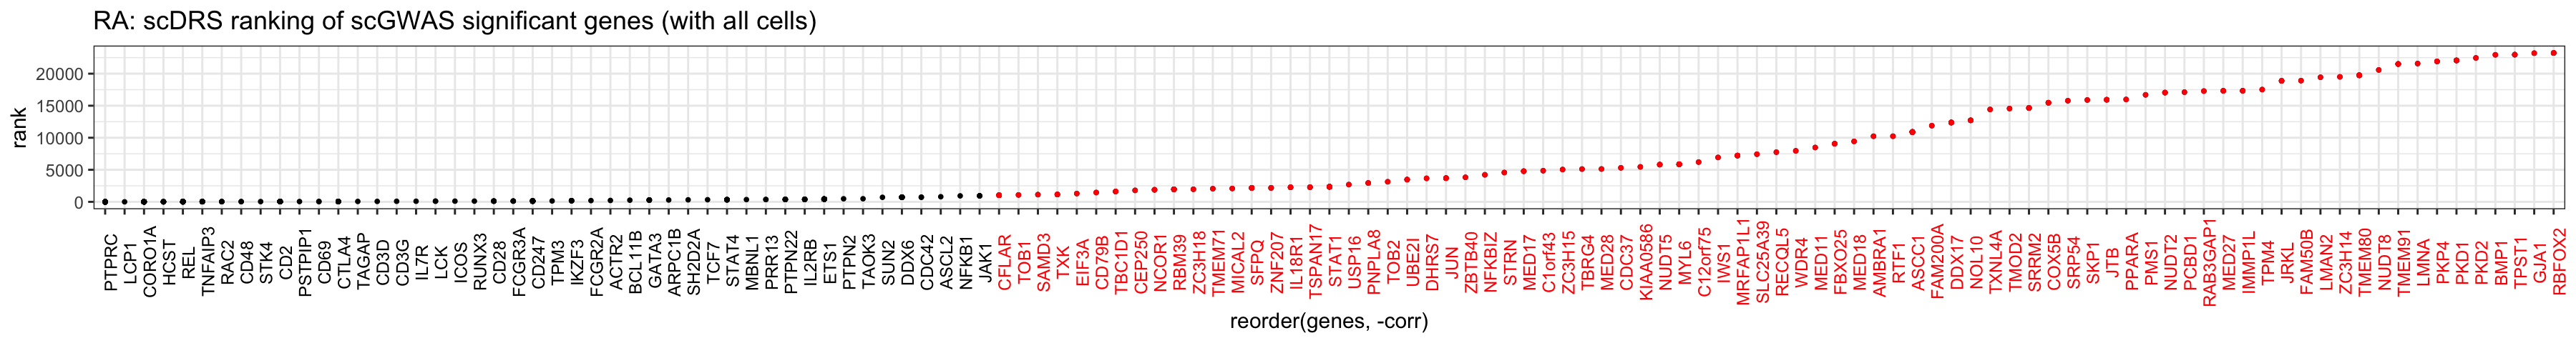

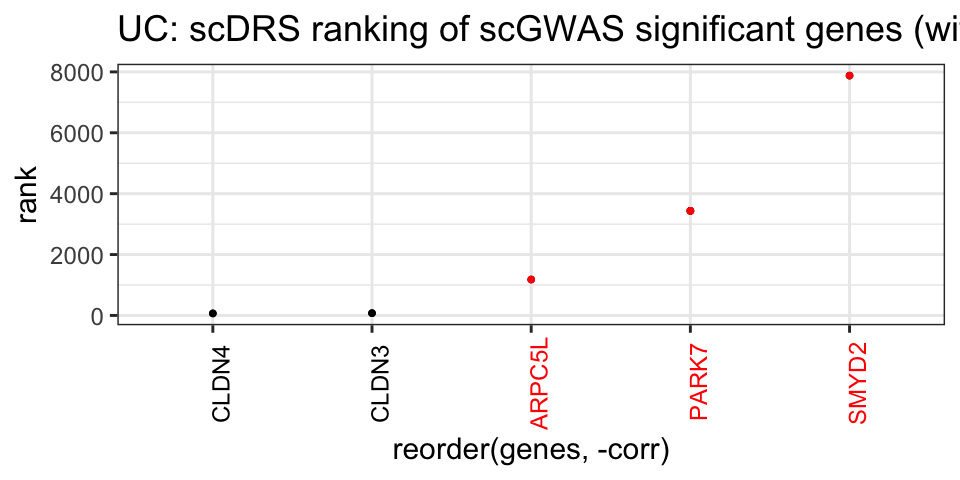

In [30]:
options(repr.plot.height = 4, repr.plot.width =30 )
library(ggtext)
p1 <- ggplot(ra_df) + 
geom_point(aes(x=reorder(genes, -corr), y=rank)) +
geom_point(data=ra_df[ra_df$rank > 1000,], aes(x=genes, y=rank), color="red") +
#geom_text_repel(data=df[df$rank > 5000,],  aes(x=genes, y=rank,label=genes), color="red") + 
theme_bw(base_size=18)+ theme(axis.text.x=element_markdown(angle=90)) + 
scale_x_discrete(labels=ra_my_labels) + ggtitle("RA: scDRS ranking of scGWAS significant genes (with all cells)")
p1
options(repr.plot.height = 4, repr.plot.width =8 )
p1 <- ggplot(uc_df) + 
geom_point(aes(x=reorder(genes, -corr), y=rank)) +
geom_point(data=uc_df[uc_df$rank > 1000,], aes(x=genes, y=rank), color="red") +
#geom_text_repel(data=df[df$rank > 5000,],  aes(x=genes, y=rank,label=genes), color="red") + 
theme_bw(base_size=18)+ theme(axis.text.x=element_markdown(angle=90)) + 
scale_x_discrete(labels=uc_my_labels) + ggtitle("UC: scDRS ranking of scGWAS significant genes (with all cells)")
p1

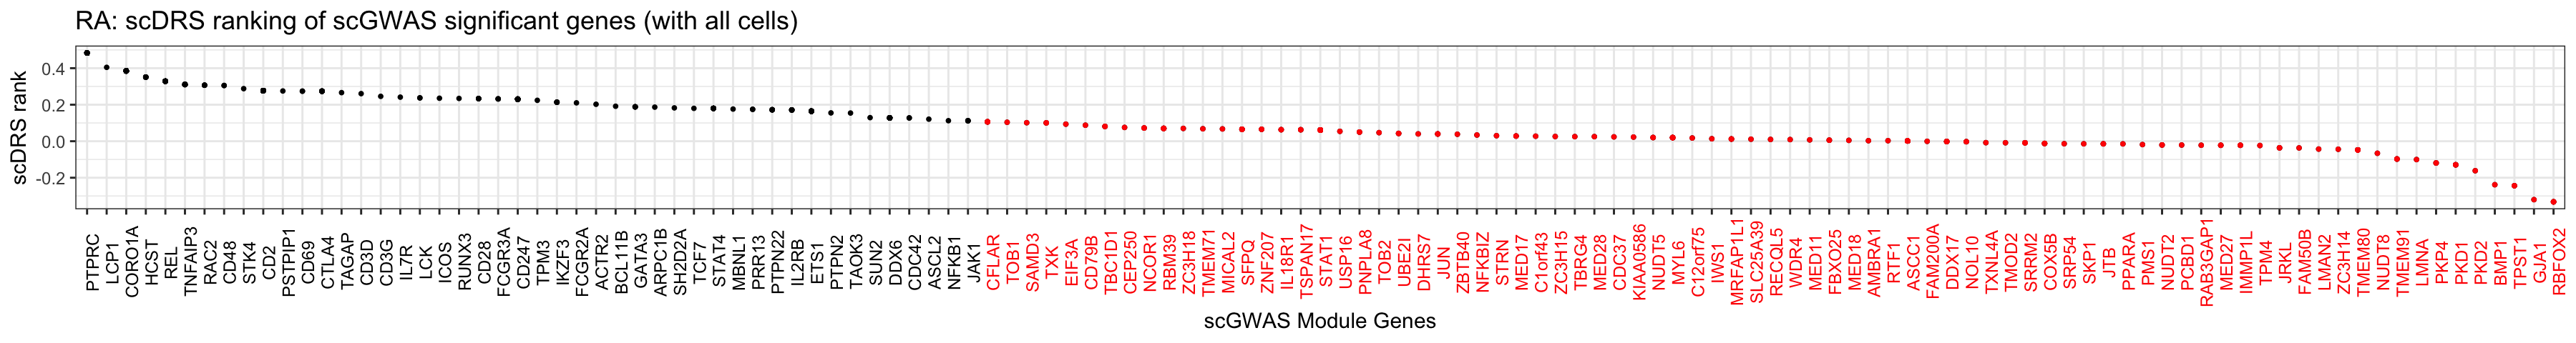

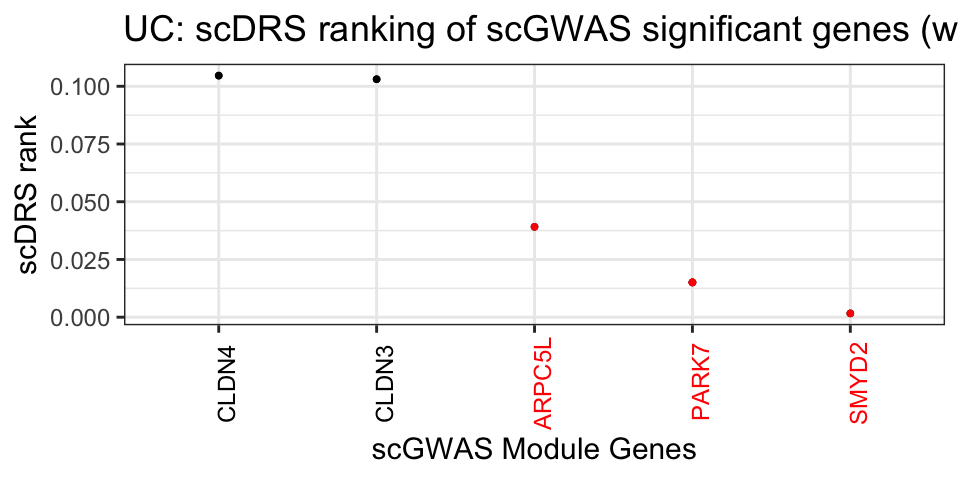

In [29]:
options(repr.plot.height = 4, repr.plot.width =30 )
library(ggtext)
p1 <- ggplot(ra_df) + 
geom_point(aes(x=reorder(genes, -corr), y=corr)) +
geom_point(data=ra_df[ra_df$rank > 1000,], aes(x=genes, y=corr), color="red") +
#geom_text_repel(data=df[df$rank > 5000,],  aes(x=genes, y=rank,label=genes), color="red") + 
theme_bw(base_size=18)+ theme(axis.text.x=element_markdown(angle=90)) + labs(x="scGWAS Module Genes", y="scDRS rank")+
scale_x_discrete(labels=ra_my_labels) + ggtitle("RA: scDRS ranking of scGWAS significant genes (with all cells)")
p1
options(repr.plot.height = 4, repr.plot.width =8 )
p1 <- ggplot(uc_df) + 
geom_point(aes(x=reorder(genes, -corr), y=corr)) +
geom_point(data=uc_df[uc_df$rank > 1000,], aes(x=genes, y=corr), color="red") +
#geom_text_repel(data=df[df$rank > 5000,],  aes(x=genes, y=rank,label=genes), color="red") + 
theme_bw(base_size=18)+ theme(axis.text.x=element_markdown(angle=90)) + labs(x="scGWAS Module Genes", y="scDRS rank") +
scale_x_discrete(labels=uc_my_labels) + ggtitle("UC: scDRS ranking of scGWAS significant genes (with all cells)")
p1

### B. Just look at NK cells for RA

In [31]:
meta_colors_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#9E0142", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#D53E4F", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#F46D43",
                    "NK-3: CD56dim CD16+ GZMB-" = "#FDAE61", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#FEE08B", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#FFFFBF", 
                    "NK-6: CD56bright CD16- GNLY+" = "#E6F598", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#ABDDA4", 
                    "NK-8: CD56bright CD16- IFN response" = "#66C2A5",
                    "NK-9: MT-high" = "#3288BD", 
                    "NK-10: PCNA+ Proliferating" = "grey",
                    "NK-11: MKI67+ Proliferating" = "dimgrey", 
                    "NK-12: IL7R+ ILC" = "#BEAED4", 
                    "NK-13: IL7R+CD161+ ILC" = "#5E4FA2")

In [33]:
ra_nk_df <- ra_df[ra_df$cluster %in% names(meta_colors_nk),]

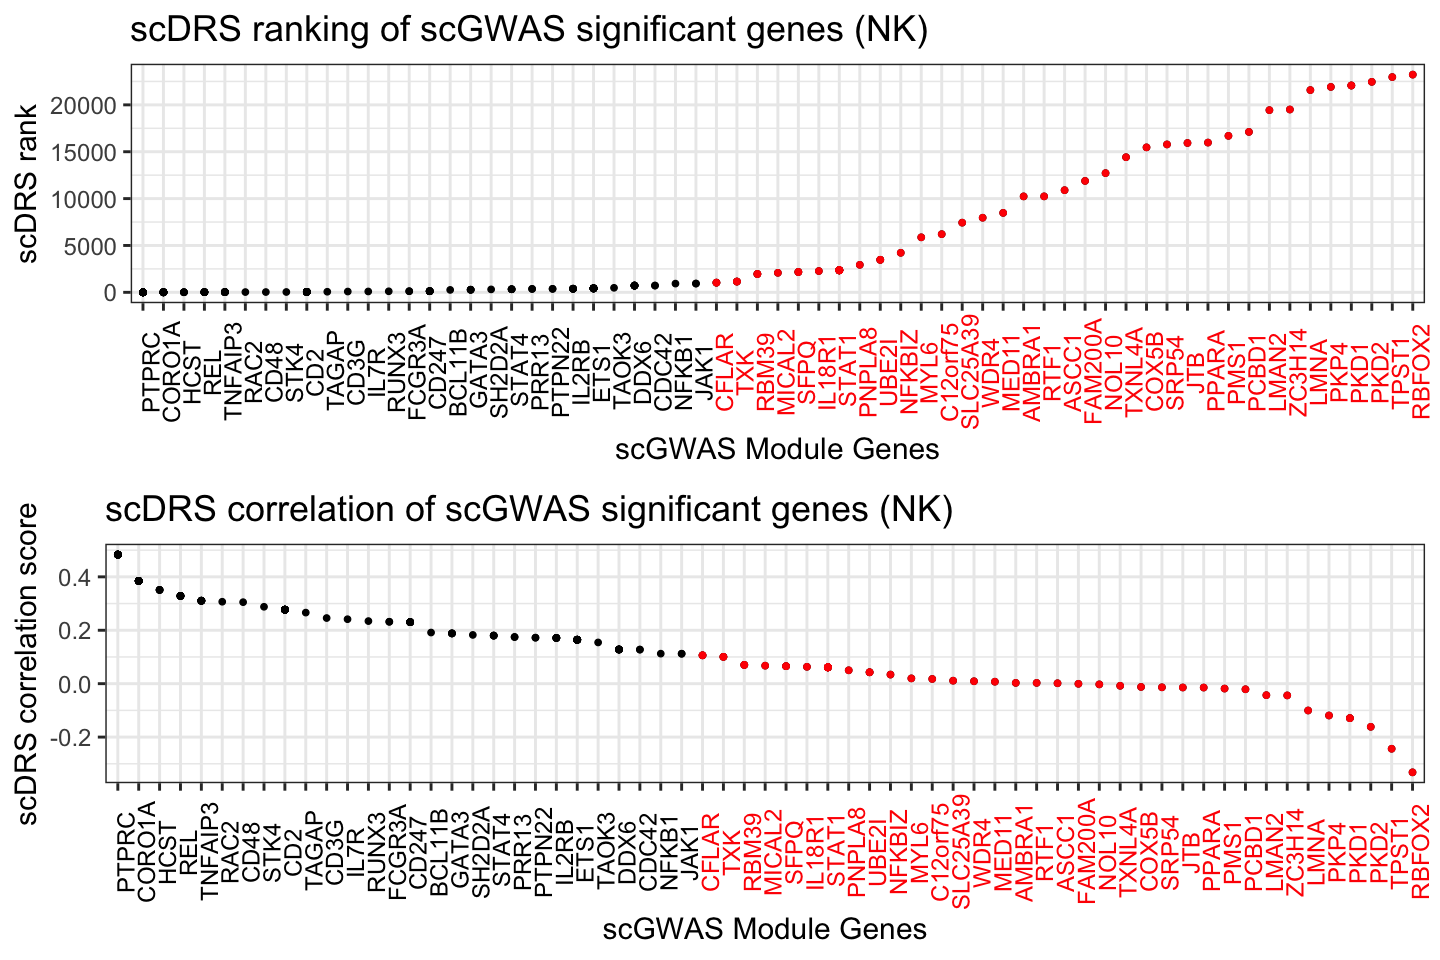

In [36]:
#install.packages("ggtext")
# library(ggtext)
library(cowplot)
options(repr.plot.height = 8, repr.plot.width =12 )
p1 <- ggplot(ra_nk_df) + 
geom_point(aes(x=reorder(genes, rank), y=rank)) +
geom_point(data=ra_nk_df[ra_nk_df$rank > 1000,], aes(x=reorder(genes, rank), y=rank), color="red") +
#geom_text_repel(data=df[df$rank > 5000,],  aes(x=genes, y=rank,label=genes), color="red") + 
theme_bw(base_size=18)+ theme(axis.text.x=element_markdown(angle=90)) + 
scale_x_discrete(labels=ra_my_labels) + ggtitle("scDRS ranking of scGWAS significant genes (NK)") + 
labs(x="scGWAS Module Genes", y="scDRS rank")
p2 <- ggplot(ra_nk_df) + 
geom_point(aes(x=reorder(genes, -corr), y=corr)) +
geom_point(data=ra_nk_df[ra_nk_df$rank > 1000,], aes(x=reorder(genes, -corr), y=corr), color="red") +
#geom_text_repel(data=df[df$rank > 5000,],  aes(x=genes, y=rank,label=genes), color="red") + 
theme_bw(base_size=18)+ theme(axis.text.x=element_markdown(angle=90)) + 
scale_x_discrete(labels=ra_my_labels) + ggtitle("scDRS correlation of scGWAS significant genes (NK)") + 
labs(x="scGWAS Module Genes", y="scDRS correlation score")
plot_grid(p1, p2, nrow=2)

### C. Just look at the Tph7 genes RA

In [39]:
# read in teh scDRS scores for just tph7
dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/white_only/downstream/"
scdrs_genes_t7 <- fread(paste0(dir, "RA.scdrs_gene_t7"))
scdrs_genes_t7[1:2,]

V1,CORR,RANK
<chr>,<dbl>,<int>
CTLA4,0.2788178,0
IRF4,0.2616977,1


In [41]:
# make dataframe of just the t7 genes
df7 <- ldply (unique(ra_cell_gene_dict['T-7: CD4+ Tph']), data.frame)
colnames(df7) <- c("genes")

In [42]:
# add scDRS scores
# make a dictionary with the scDRS scores
scdrs_gene_t7_corr <- scdrs_genes_t7$CORR
names(scdrs_gene_t7_corr) <- scdrs_genes_t7$V1
scdrs_gene_t7_rank <- scdrs_genes_t7$RANK
names(scdrs_gene_t7_rank) <- scdrs_genes_t7$V1
# add this to them
rank_list = list()
corr_list = list()
for (gene in df7$genes) {
    rank_list <- c(rank_list, scdrs_gene_t7_rank[gene])
    corr_list <- c(corr_list, scdrs_gene_t7_corr[gene])
    }
# add to the dataframe
df7$rank <- as.numeric(rank_list)
df7$corr <- as.numeric(corr_list)


In [43]:
df7$category <- ifelse(df7$genes %in% df7[df7$rank > 5000,]$genes, 0, 1)
df7$category <- as.factor(df7$category)

# create the labels 
my_labels <- glue_data(
  df7, 
  "<span style='color: {if_else(category==0, 'red', 'black')}'>{genes}</span>"
  )
names(my_labels) <- df7$genes

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


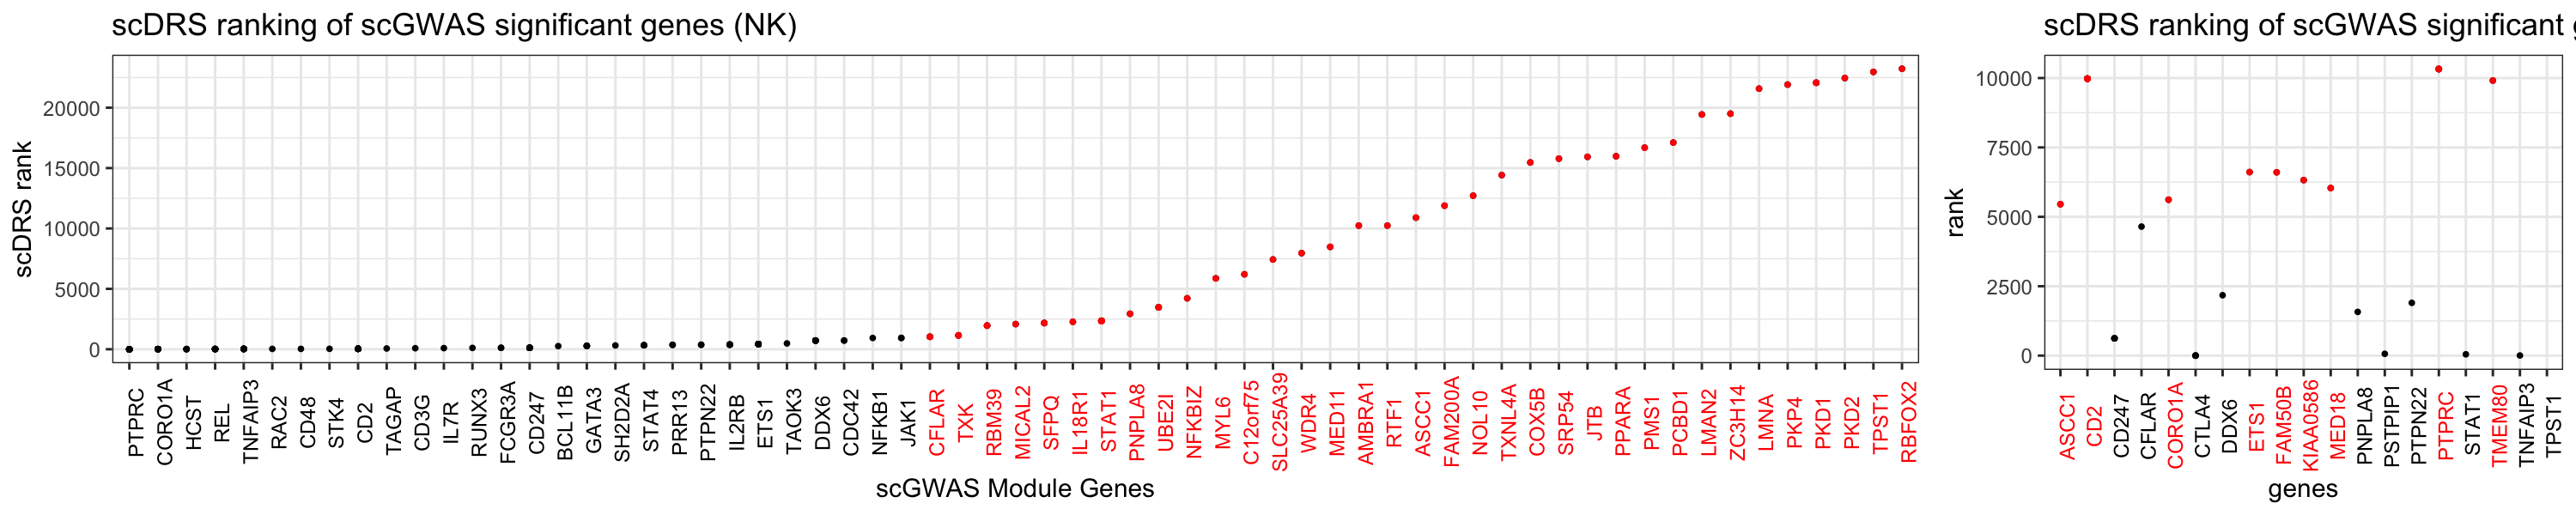

In [45]:
#install.packages("ggtext")
options(repr.plot.height = 5, repr.plot.width =25 )
p2 <- ggplot(df7) + 
geom_point(aes(x=genes, y=rank)) +
geom_point(data=df7[df7$rank > 5000,], aes(x=genes, y=rank), color="red") +
#geom_text_repel(data=df[df$rank > 5000,],  aes(x=genes, y=rank,label=genes), color="red") + 
theme_bw(base_size=18)+ theme(axis.text.x=element_markdown(angle=90)) + 
scale_x_discrete(labels=my_labels) + ggtitle("scDRS ranking of scGWAS significant genes (Tph7)")
plot_grid(p1, p2, nrow=1, rel_widths=c(3,1))

In [48]:
unique(ra_df[order(ra_df$rank),]$genes)[1:10]
unique(df7[order(df7$rank),]$genes)[1:10]
table(df7$genes)
scdrs_genes$V1[51:100]
scdrs_genes_t7$V1[51:100]

[1] "PTPRC"   "LCP1"    "CORO1A"  "HCST"    "REL"     "TNFAIP3" "RAC2"   
 [8] "CD48"    "STK4"    "CD2"

[1] "CTLA4"   "TNFAIP3" "STAT1"   "PSTPIP1" "CD247"   "PNPLA8"  "PTPN22" 
 [8] "DDX6"    "CFLAR"   "ASCC1"


   ASCC1      CD2    CD247    CFLAR   CORO1A    CTLA4     DDX6     ETS1 
       1        7        4        1        1        4        1        1 
  FAM50B KIAA0586    MED18   PNPLA8  PSTPIP1   PTPN22    PTPRC    STAT1 
       1        1        1        1        1        1        4        1 
  TMEM80  TNFAIP3    TPST1 
       1        1        1 

[1] "SLC51B"    "C1orf106"  "SELK"      "CEACAM7"   "CD27"      "SLAMF7"   
 [7] "BTG2"      "GUCA2A"    "DNAJB9"    "RGS1"      "TMIGD1"    "GUCA2B"   
[13] "TNFRSF14"  "SEC61B"    "COX5A"     "ITM2C"     "PRELID1"   "CLDN4"    
[19] "PPAPDC1B"  "SPCS1"     "CISD2"     "LINC00035" "HIST1H2BK" "PRDX4"    
[25] "CDK2AP2"   "CLDN3"     "CD74"      "NANS"      "ANKRD28"   "AURKAIP1" 
[31] "KDELR2"    "EZR"       "IGLV2-14"  "SCNN1B"    "HIST1H1C"  "EAF2"     
[37] "AMN"       "MCL1"      "RNASET2"   "CLCA4"     "SAT1"      "LY96"     
[43] "TXNDC11"   "LSR"       "C19orf10"  "TRIM31"    "SUB1"      "C19orf33" 
[49] "CA4"       "HSPA1B"

[1] "DNAJA2"   "ANP32E"   "TNFRSF1B" "NDFIP2"   "NASP"     "CD200"   
 [7] "BZW1"     "PDCL3"    "PPP2CA"   "RUNX3"    "DUSP5"    "PDIA6"   
[13] "NAMPT"    "EMD"      "ARF1"     "PSTPIP1"  "HSPH1"    "TIGIT"   
[19] "GRB2"     "NFKB1"    "PSMC2"    "HSPD1"    "HSP90AB1" "TAP1"    
[25] "PSMD4"    "FAS"      "YPEL5"    "ODC1"     "LBH"      "DNTTIP2" 
[31] "CCNI"     "KIF5B"    "PRDX5"    "NFKBIA"   "SUB1"     "EZR"     
[37] "GALNT1"   "TENT5C"   "PGK1"     "CCT8"     "KPNB1"    "PSMC1"   
[43] "ANXA7"    "PSMD1"    "UBE2L3"   "DNPH1"    "NINJ1"    "TNIP1"   
[49] "OPTN"     "MRPL4"

## 4. Vizualize scGWAS & MAGMA scores as Distribution based graphs 

In [49]:
# read in magma used
ra_magma_genes_5035 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/MAGMA/RA/RA_5035_Pval_2023_06_13.tsv")
uc_magma_genes_5035 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/MAGMA/UC/UC_53kb_Pval_onlyinrna_nodups_12-20-23.tsv")
ra_magma_genes_5035[1:5,]
uc_magma_genes_5035[1:5,]

GENE,RA
<chr>,<dbl>
TNPO3,1.8475e-19
ANKRD55,1.6243e-16
CTLA4,1.9285e-16
MAGI3,2.1557e-16
PTPN2,1.2960e-15


GENE,UC
<chr>,<dbl>
SLC26A3,2.4336e-18
RP11-91K11.2,7.3309e-18
TMCO4,1.9201e-17
CARD9,7.9719e-17
GSDMB,1.8175e-16


### A. UC & RA

In [92]:
# plot all correlation values and see where the scGWAS genes are
p1 <- ggplot() + geom_histogram(data=uc_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=uc_scdrs_genes[uc_scdrs_genes$V1 %in% uc_df$genes], color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("B) ") +
# geom_text_repel(data=scdrs_genes[scdrs_genes$V1 %in% c("LMNA", "CD2", "PTPRC", "CORO1A", "HCST", "REL", "CXCR4", "TNFAIP3")],
#                 aes(x=CORR, y=1, label=V1), vjust=-2.5, size=4.5, fontface="bold") +
geom_text_repel(data=uc_scdrs_genes[uc_scdrs_genes$V1 %in% c("CLDN3", "CLDN4")],
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") +
geom_text_repel(data=uc_scdrs_genes[uc_scdrs_genes$V1 %in% c("PARK7", "SMYD2")],
                aes(x=CORR, y=1, label=V1), hjust=2.5, vjust=-7, size=6, color="black", fontface="bold") +
geom_text_repel(data=uc_scdrs_genes[uc_scdrs_genes$V1 %in% c( "ARPC5L")],
                aes(x=CORR, y=1, label=V1), hjust=-0.4, vjust=-7, size=6, fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(uc_scdrs_genes[uc_scdrs_genes$V1 %in% uc_df$genes]$CORR)) + 
geom_text(vjust=1.2, hjust=-0.2, size=8,color="turquoise2", aes(x=median(uc_scdrs_genes[uc_scdrs_genes$V1 %in% uc_df$genes]$CORR),y=2000, 
                                                                label=paste("median:", round(median(uc_scdrs_genes[uc_scdrs_genes$V1 %in% uc_df$genes]$CORR), 2))))

# plot all correlation values and see where the scGWAS genes are
p2 <- ggplot() + geom_histogram(data=uc_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=uc_scdrs_genes[uc_scdrs_genes$V1 %in% uc_magma_genes_5035$GENE[1:100]], color="red", fill="red", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("D)") +
geom_text_repel(data=uc_scdrs_genes[uc_scdrs_genes$V1 %in% c("RPL3", "PTRF", "SLC26A3", "HSPA6", "RNF186", "IL23R", "TMCO4", "DNLZ", "GSDMB")], 
                aes(x=CORR, y=1, label=V1), vjust=-3, size=6, fontface="bold") +
geom_text_repel(data=uc_scdrs_genes[uc_scdrs_genes$V1 %in% c("NKX2-3")], 
                aes(x=CORR, y=1, label=V1), vjust=-4.6, size=6, fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(uc_scdrs_genes[uc_scdrs_genes$V1 %in% uc_magma_genes_5035$GENE[1:100]]$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="red", aes(x=median(uc_scdrs_genes[uc_scdrs_genes$V1 %in% uc_magma_genes_5035$GENE[1:100]]$CORR),y=2000, 
                                              label=paste("median:",round(median(uc_scdrs_genes[uc_scdrs_genes$V1 %in% uc_magma_genes_5035$GENE[1:100]]$CORR), 2))))

In [93]:
uc_df$genes
#ra_df$genes

[1] "CLDN3"  "CLDN4"  "PARK7"  "SMYD2"  "CLDN3"  "CLDN4"  "PARK7"  "ARPC5L"

In [163]:
# plot all correlation values and see where the scGWAS genes are
p33 <- ggplot() + geom_histogram(data=ra_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_df$genes], color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("A)") +
# geom_text_repel(data=scdrs_genes[scdrs_genes$V1 %in% c("LMNA", "CD2", "PTPRC", "CORO1A", "HCST", "REL", "CXCR4", "TNFAIP3")],
#                 aes(x=CORR, y=1, label=V1), vjust=-2.5, size=4.5, fontface="bold") +
geom_text_repel(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% c("PTPRC", "LCP1", "CORO1A", "HCST", "REL")],
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") +
geom_text_repel(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% c("RBFOX2", "GJA1", "TPST1", "BMP1")],
                aes(x=CORR, y=1, label=V1), hjust=.5, vjust=-2.5, size=6, color="black", fontface="bold") +
# geom_text_repel(data=scdrs_genes[scdrs_genes$V1 %in% c( "ARPC5L")],
#                 aes(x=CORR, y=1, label=V1), hjust=-0.4, vjust=-7, size=4.5, color="black", fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_df$genes]$CORR)) + 
geom_text(vjust=1.2, hjust=-0.2, size=8,color="turquoise2", aes(x=median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_df$genes]$CORR),y=2000, 
                                                                label=paste("median:", round(median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_df$genes]$CORR), 2))))

# plot all correlation values and see where the scGWAS genes are
p44 <- ggplot() + geom_histogram(data=ra_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_magma_genes_5035$GENE[1:100]], color="red", fill="red", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("C) ") +
geom_text_repel(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% c("OLFML3", "WISP1", "OS9", "REL", "TNFAIP3", "CD2")], 
                aes(x=CORR, y=1, label=V1), vjust=-3, size=6, fontface="bold") +
# geom_text_repel(data=scdrs_genes[scdrs_genes$V1 %in% c("NKX2-3")], 
#                 aes(x=CORR, y=1, label=V1), vjust=-4.5, size=4.5, fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_magma_genes_5035$GENE[1:100]]$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="red", aes(x=median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_magma_genes_5035$GENE[1:100]]$CORR),y=2000, 
                                              label=paste("median:",round(median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_magma_genes_5035$GENE[1:100]]$CORR), 2))))

pdf 
  2

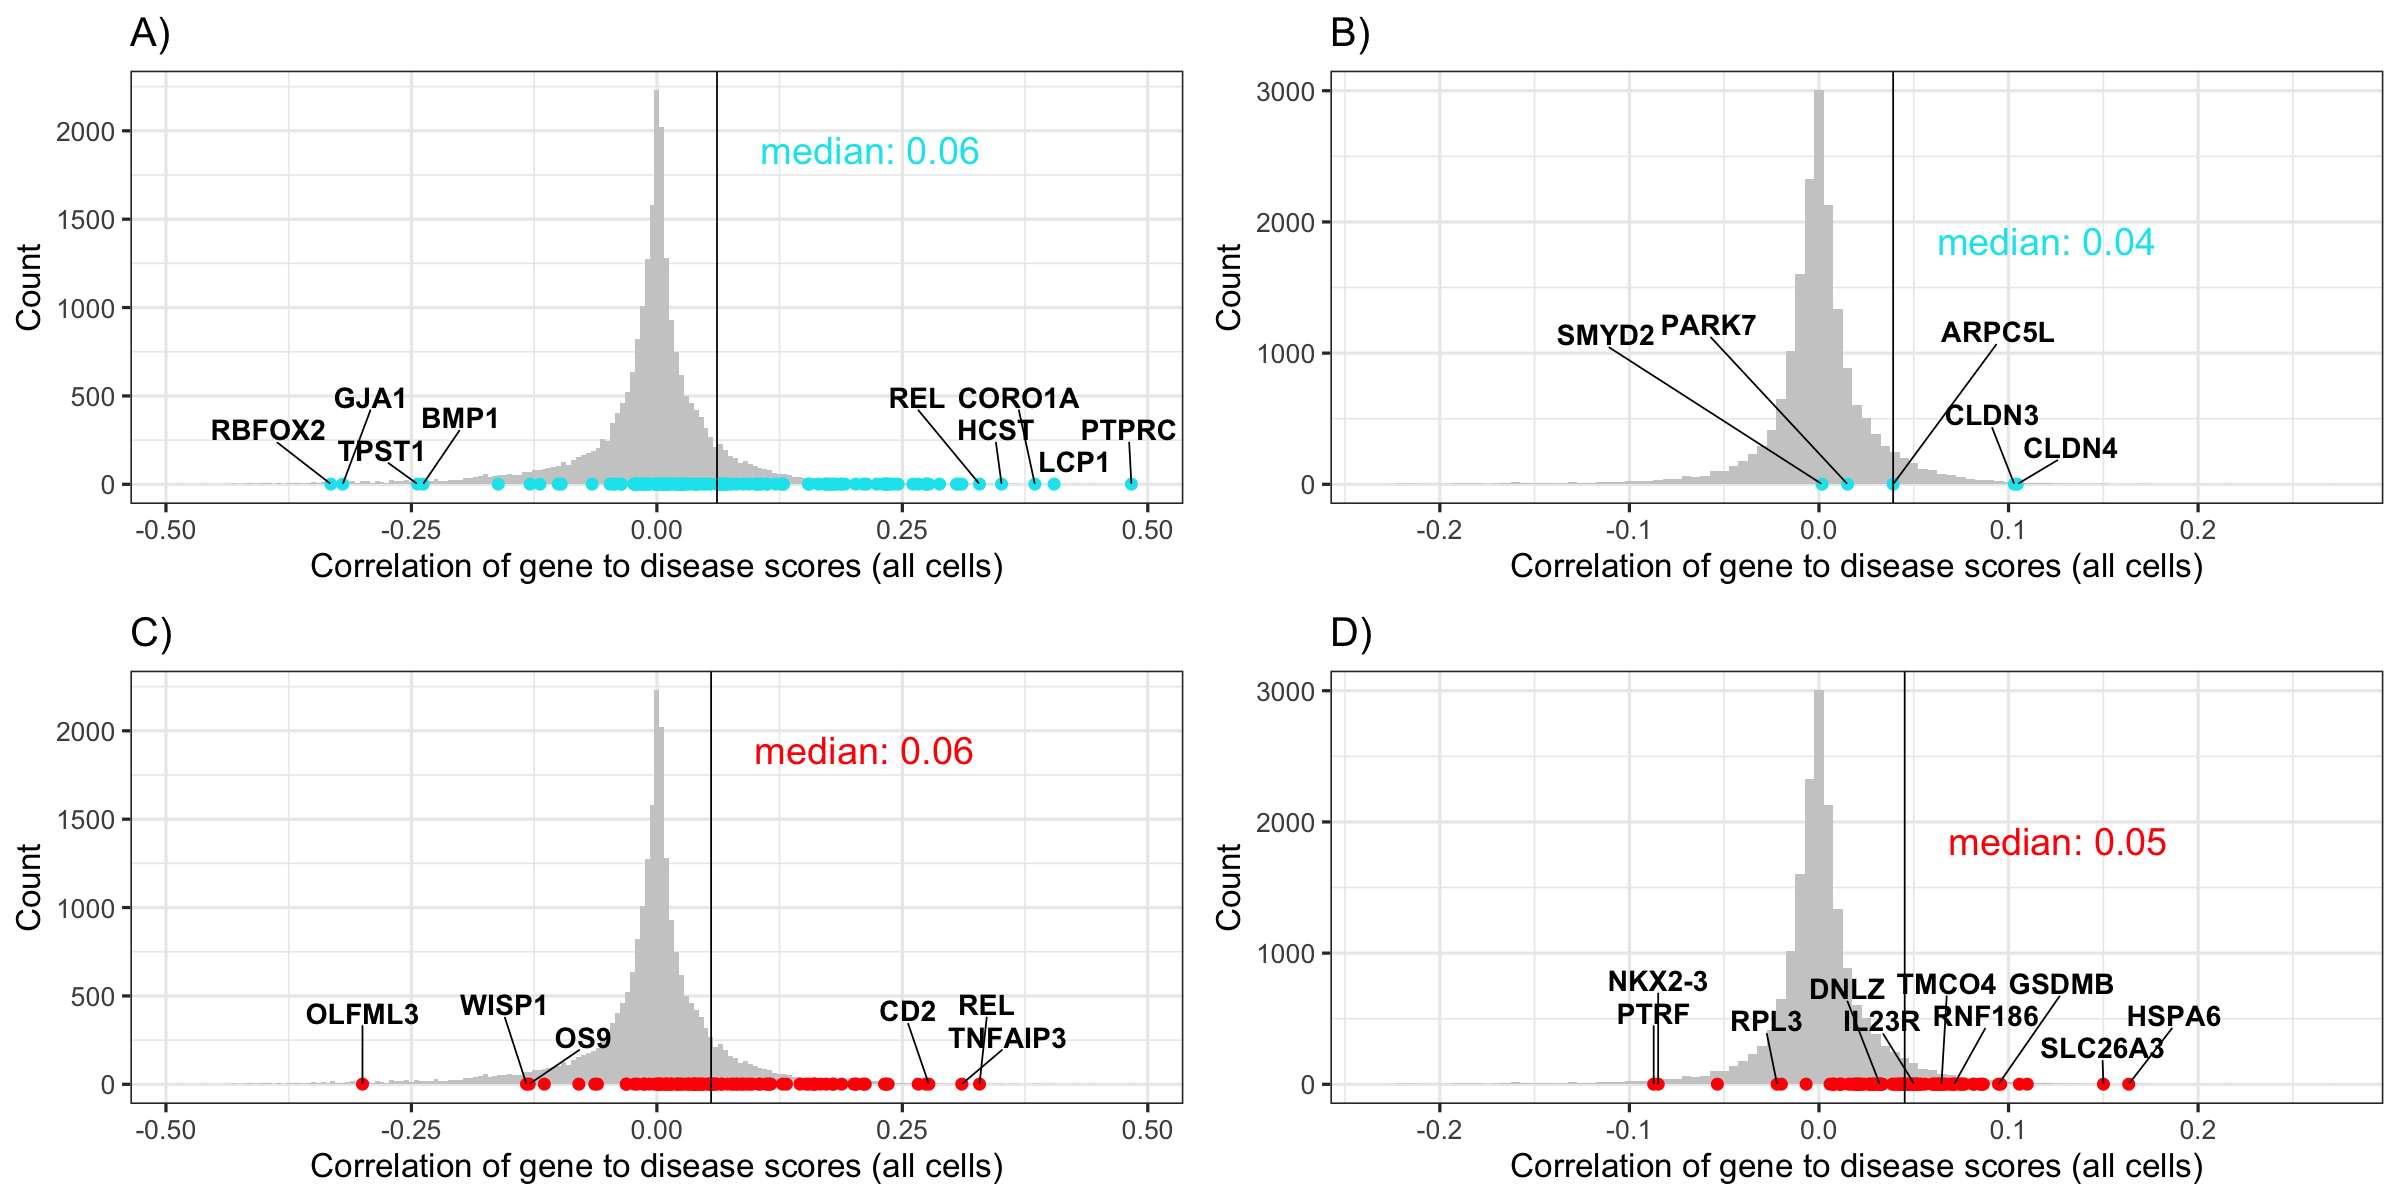

In [99]:
options(repr.plot.height = 10, repr.plot.width =20 )
p <- plot_grid(p33, p1, p44, p2, nrow=2)
pdf("../../output//Final_figures/Gene_RA_UC.pdf", height=10, width=20)
print(p)
dev.off()
p

### B. NK in RA (NK-8 especially)

In [138]:
nk_scdrs_genes <- fread("~/Downloads/RA_NK.scdrs_gene")
nk_scdrs_genes[1:5,]
nk_scdrs_genes[12560:12563,] 

V1,CORR,RANK
<chr>,<dbl>,<int>
S1PR5,0.2458598,0
FGFBP2,0.2246483,1
FCGR3A,0.2233601,2
SPON2,0.2146290,3
LITAF,0.2023336,4


V1,CORR,RANK
<chr>,<dbl>,<int>
XCL1,-0.1845675,12559
MT-ND3,-0.1867678,12560
MALAT1,-0.1971787,12561
MT-ND1,-0.2102794,12562


[1] "AMBRA1"  "CD2"     "CD247"   "CDC42"   "CFLAR"   "CORO1A"  "COX5B"  
 [8] "ETS1"    "GATA3"   "IL2RB"   "JAK1"    "JTB"     "LMNA"    "MED11"  
[15] "NOL10"   "PCBD1"   "PKD2"    "PTPRC"   "RAC2"    "RTF1"    "SRP54"  
[22] "STAT1"   "STK4"    "TAGAP"   "TNFAIP3" "TXNL4A"  "UBE2I"   "WDR4"

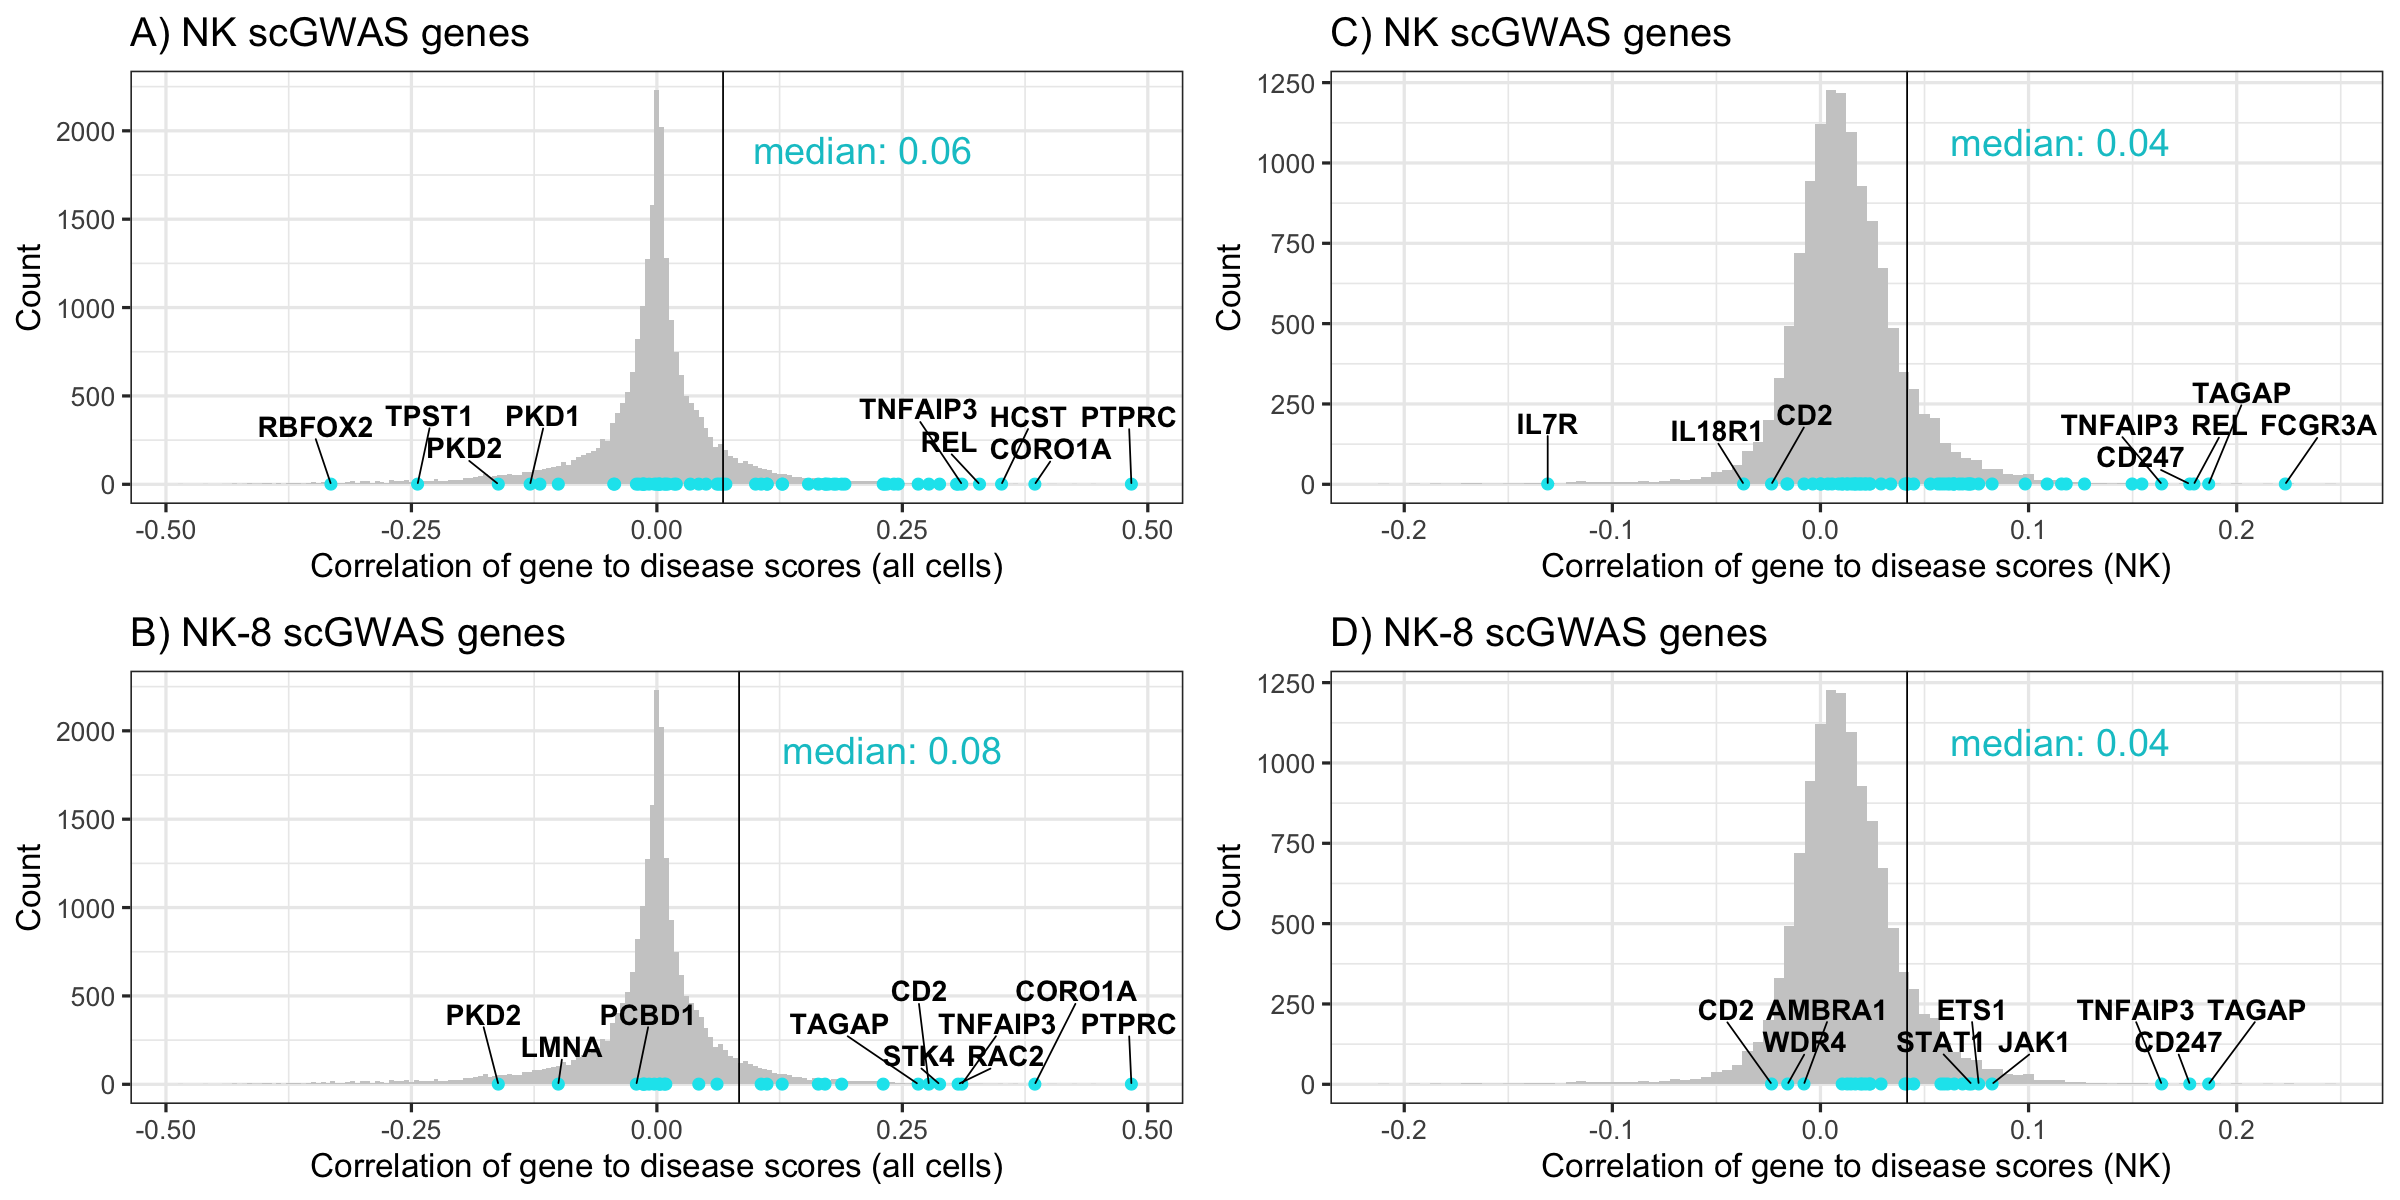

In [183]:
# plot all correlation values and see where the scGWAS genes are
sort(unique(ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]]))
p1 <- ggplot() + geom_histogram(data=ra_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_nk_df$genes], color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("A) NK scGWAS genes") +
geom_text_repel(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% c("PTPRC", "CORO1A", "HCST", "REL", "PKD1", "PKD2", "TPST1", "RBFOX2", "TNFAIP3")], aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_nk_df$genes]$CORR)) + 
geom_text(vjust=1.2, hjust=-0.03, size=8,color="turquoise3", aes(x=0.03+median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_df$genes]$CORR),y=2000, 
                                                                label=paste("median:", round(median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_df$genes]$CORR), 2))))
p2 <- ggplot() + geom_histogram(data=nk_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=nk_scdrs_genes[nk_scdrs_genes$V1 %in% ra_nk_df$genes], color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (NK)", y="Count") + ggtitle("C) NK scGWAS genes") + 
#geom_text_repel(data=nk_scdrs_genes[nk_scdrs_genes$V1 %in% c("NT-ND1", "MALAT1")], aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") +
geom_text_repel(data=nk_scdrs_genes[nk_scdrs_genes$V1 %in% c("FCGR3A", "TAGAP", "REL", "CD247", "TNFAIP3", "IL7R", "IL18R1", "CD2")], aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=median(nk_scdrs_genes[nk_scdrs_genes$V1 %in% ra_nk_df$genes]$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="turquoise3", aes(x=median(nk_scdrs_genes[nk_scdrs_genes$V1 %in% ra_nk_df$genes]$CORR),y=1125, 
                                                                label=paste("median:", round(median(nk_scdrs_genes[nk_scdrs_genes$V1 %in% ra_nk_df$genes]$CORR), 2))))

# plot all correlation values and see where the scGWAS genes are
p3 <- ggplot() + geom_histogram(data=ra_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]]], color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("B) NK-8 scGWAS genes") +
geom_text_repel(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% c("PTPRC", "CORO1A", "TNFAIP3", "RAC2", "STK4", "CD2", "TAGAP", "PKD2", "LMNA", "PCBD1"),], aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]],]$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="turquoise3", aes(x=median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]],]$CORR),y=2000, 
                                              label=paste("median:",round(median(ra_scdrs_genes[ra_scdrs_genes$V1 %in% ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]],]$CORR), 2))))
p4 <- ggplot() + geom_histogram(data=nk_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=nk_scdrs_genes[nk_scdrs_genes$V1 %in% ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]]], color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (NK)", y="Count") + ggtitle("D) NK-8 scGWAS genes") + 
geom_text_repel(data=nk_scdrs_genes[nk_scdrs_genes$V1 %in% c("TAGAP", "CD247", "TNFAIP3", "JAK1", "ETS1", "STAT1", "CD2", "WDR4", "AMBRA1")], aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=median(nk_scdrs_genes[nk_scdrs_genes$V1 %in% ra_nk_df$genes]$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="turquoise3", aes(x=median(nk_scdrs_genes[nk_scdrs_genes$V1 %in% ra_nk_df$genes]$CORR),y=1125, 
                                                                label=paste("median:", round(median(nk_scdrs_genes[nk_scdrs_genes$V1 %in% ra_nk_df$genes]$CORR), 2))))
options(repr.plot.height = 10, repr.plot.width =20 )
p <- plot_grid(p1, p2, p3,p4, nrow=2)
p

In [185]:
pdf("../../output//Final_figures/NK_genes.pdf", height=10, width=20)
print(p)
dev.off()

pdf 
  2

In [231]:
setdiff(sort(unique(ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]])), ra_nk_df$genes)
setdiff(ra_nk_df$genes, sort(unique(ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]])))

sort(unique(ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]]))
sort(unique(ra_cell_gene_dict[["T-7: CD4+ Tph"]]))



character(0)

[1] "FCGR3A"   "TXK"      "PKD1"     "MICAL2"   "IL7R"     "RBM39"   
 [7] "HCST"     "PNPLA8"   "SLC25A39" "DDX6"     "REL"      "SH2D2A"  
[13] "C12orf75" "CD3G"     "TAOK3"    "STAT4"    "PTPN22"   "ZC3H14"  
[19] "RBFOX2"   "PRR13"    "CD48"     "IL18R1"   "BCL11B"   "NFKB1"   
[25] "SFPQ"     "MYL6"     "NFKBIZ"   "PMS1"     "LMAN2"    "ASCC1"   
[31] "RUNX3"    "FAM200A"  "PPARA"    "PKP4"     "TPST1"

[1] "AMBRA1"  "CD2"     "CD247"   "CDC42"   "CFLAR"   "CORO1A"  "COX5B"  
 [8] "ETS1"    "GATA3"   "IL2RB"   "JAK1"    "JTB"     "LMNA"    "MED11"  
[15] "NOL10"   "PCBD1"   "PKD2"    "PTPRC"   "RAC2"    "RTF1"    "SRP54"  
[22] "STAT1"   "STK4"    "TAGAP"   "TNFAIP3" "TXNL4A"  "UBE2I"   "WDR4"

[1] "ASCC1"    "CD2"      "CD247"    "CFLAR"    "CORO1A"   "CTLA4"   
 [7] "DDX6"     "ETS1"     "FAM50B"   "KIAA0586" "MED18"    "PNPLA8"  
[13] "PSTPIP1"  "PTPN22"   "PTPRC"    "STAT1"    "TMEM80"   "TNFAIP3" 
[19] "TPST1"

### C. T7 in RA

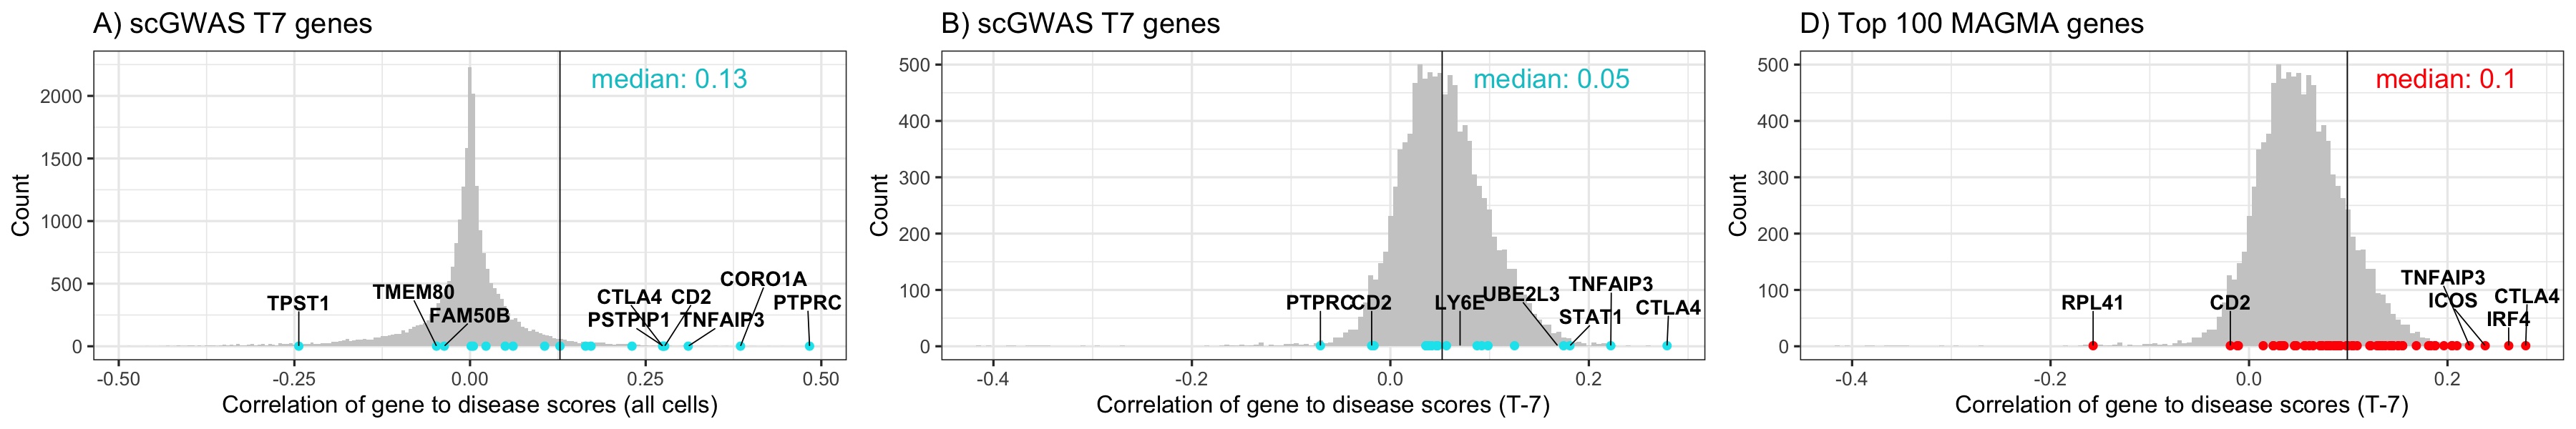

In [187]:
# plot all correlation values and see where the scGWAS genes are
use = ra_scdrs_genes[ra_scdrs_genes$V1 %in% df7$genes]
p1 <- ggplot() + geom_histogram(data=ra_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("A) scGWAS T7 genes") + 
geom_text_repel(data=ra_scdrs_genes[ra_scdrs_genes$V1 %in% 
                                    c("PTPRC", "CORO1A", "TNFAIP3", "CD2", "PSTPIP1", "CTLA4", "TPST1", "TMEM80", "FAM50B")], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=median(use$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="turquoise3", aes(x=median(use$CORR),y=2250, label=paste("median:", round(median(use$CORR), 2))))
p2 <- ggplot() + geom_histogram(data=scdrs_genes_t7, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=scdrs_genes_t7[scdrs_genes_t7$V1 %in% df7$genes], color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (T-7)", y="Count") + ggtitle("B) scGWAS T7 genes") + 
geom_text_repel(data=scdrs_genes_t7[scdrs_genes_t7$V1 %in% c("LY6E", "CD2")], aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") +
geom_text_repel(data=scdrs_genes_t7[scdrs_genes_t7$V1 %in% c("PTPRC", "CTLA4", "TNFAIP3", "STAT1", "UBE2L3")], aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=median(scdrs_genes_t7[scdrs_genes_t7$V1 %in% df7$genes]$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="turquoise3", aes(x=median(scdrs_genes_t7[scdrs_genes_t7$V1 %in% df7$genes]$CORR),y=500, label=paste("median:", round(median(scdrs_genes_t7[scdrs_genes_t7$V1 %in% df7$genes]$CORR), 2))))
# plot all correlation values and see where the scGWAS genes are
p4 <- ggplot() + geom_histogram(data=scdrs_genes_t7, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=scdrs_genes_t7[scdrs_genes_t7$V1 %in% ra_magma_genes_5035$GENE[1:100]], color="red", fill="red", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (T-7)", y="Count") + ggtitle("D) Top 100 MAGMA genes") + 
geom_text_repel(data=scdrs_genes_t7[scdrs_genes_t7$V1 %in% c("CD2")], aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") +
geom_text_repel(data=scdrs_genes_t7[scdrs_genes_t7$V1 %in% c("CTLA4", "IRF4", "ICOS", "TNFAIP3", "RPL41")], aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=median(scdrs_genes_t7[scdrs_genes_t7$V1 %in% ra_magma_genes_5035$GENE[1:100]]$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="red", aes(x=median(scdrs_genes_t7[scdrs_genes_t7$V1 %in% ra_magma_genes_5035$GENE[1:100]]$CORR),y=500, 
                                              label=paste("median:",round(median(scdrs_genes_t7[scdrs_genes_t7$V1 %in% ra_magma_genes_5035$GENE[1:100]]$CORR), 2))))
options(repr.plot.height = 5, repr.plot.width =30 )
p <- plot_grid( p1, p2, p4, nrow=1)
p

In [188]:
pdf("../../output//Final_figures/T7_genes.pdf", height=5, width=30)
print(p)
dev.off()

pdf 
  2

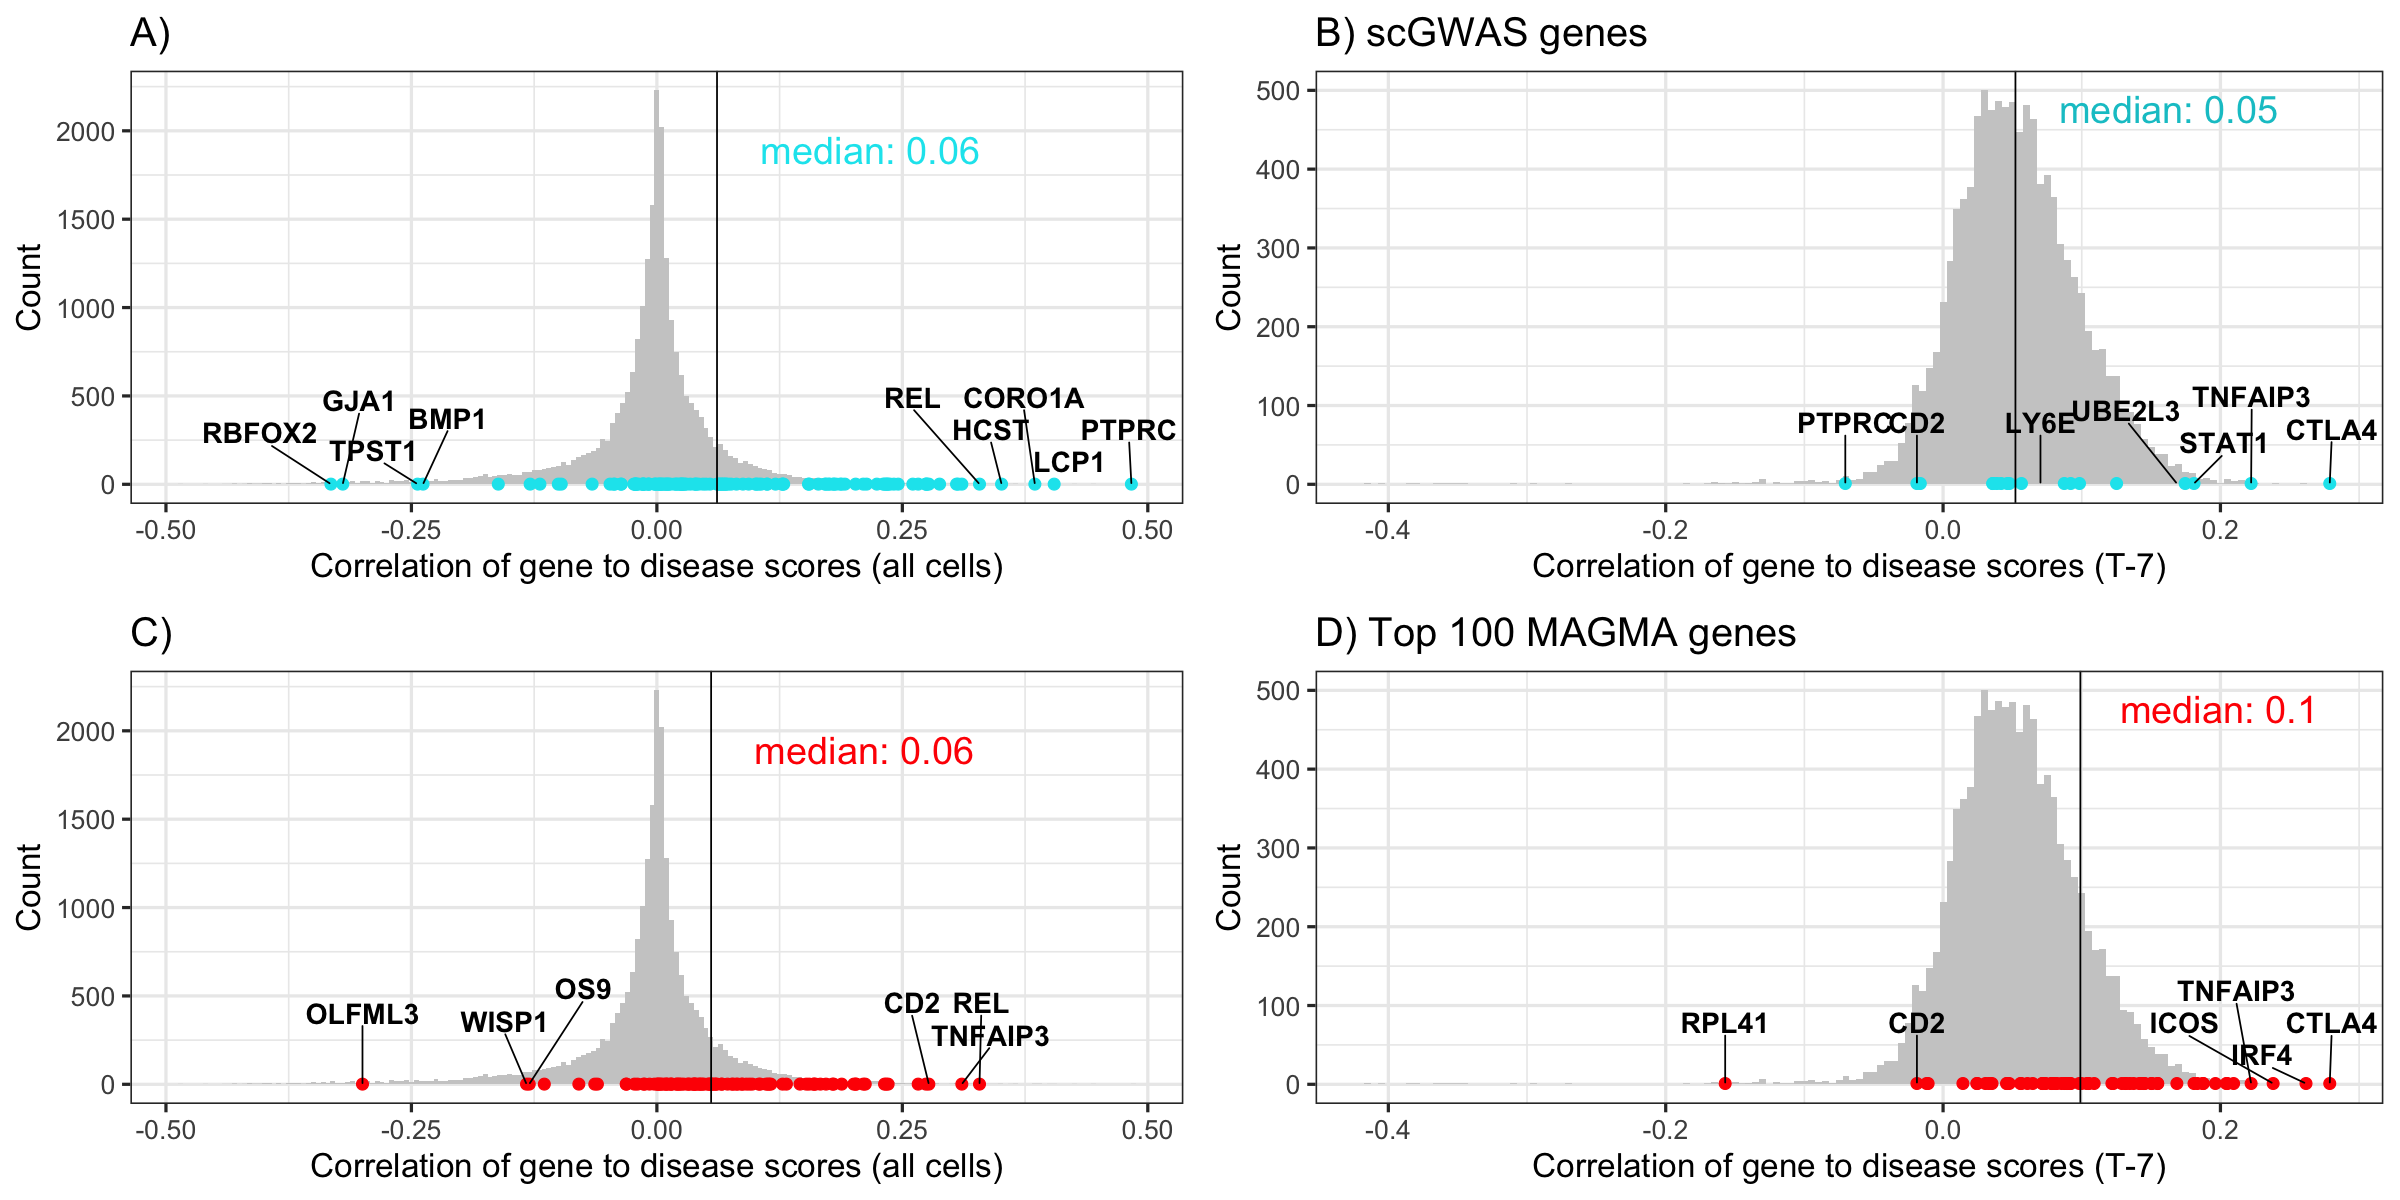

In [166]:
options(repr.plot.height = 10, repr.plot.width =20 )
plot_grid( p33, p2, p44, p4, nrow=2)

When focusing on a single cluster, the trend was not much improved. T-7 had the largest number of genes called as significant by scGWAS, and although the distribution of correlation scores of these genes had a mean correlation of 0.11 so were right shifted, they were mostly not among the top ranking genes.
It appears that scGWAS and scDRS propose substantially different genes as the most linked to disease. It is important to note, however, that while scGWAS proposes gene modules as possible gene networks important in disease, scDRS only gives an example of using the gene list as an exploratory purpose to identify unexpected additional genes that may be important in disease. 

### D. Compare T-7 and NK-8 if we consider genes shared
Some genes are called by scGWAS as significant for both T-7 and NK-8 clusters. Is a difference maintained if we remove these groups?

In [232]:
length(unique(ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]]))
length(unique(ra_cell_gene_dict[["T-7: CD4+ Tph"]]))
intersect(unique(ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]]), 
        unique(ra_cell_gene_dict[["T-7: CD4+ Tph"]]))

[1] 28

[1] 19

[1] "CORO1A"  "ETS1"    "PTPRC"   "STAT1"   "TNFAIP3" "CD2"     "CD247"  
[8] "CFLAR"

In [233]:
use_nk8 = ra_scdrs_genes[ra_scdrs_genes$V1 %in% unique(ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]]),]
use_t7 = ra_scdrs_genes[ra_scdrs_genes$V1 %in% unique(ra_cell_gene_dict[["T-7: CD4+ Tph"]]),]
median(use_nk8$CORR)
median(use_t7$CORR)

[1] 0.08372979

[1] 0.1280087

In [234]:
uniq_nk8 <- setdiff(ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]], ra_cell_gene_dict[["T-7: CD4+ Tph"]])
uniq_t7 <- setdiff(ra_cell_gene_dict[["T-7: CD4+ Tph"]], ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]])
length(uniq_nk8)
length(uniq_t7)

use_nk8 = ra_scdrs_genes[ra_scdrs_genes$V1 %in% uniq_nk8,]
use_t7 = ra_scdrs_genes[ra_scdrs_genes$V1 %in% uniq_t7,]
median(use_nk8$CORR)
median(use_t7$CORR)

[1] 20

[1] 11

[1] 0.005175296

[1] 0.02272951

### E. See how correlations change depending on the cells considered (all considering scDRS)

In [254]:
# top 20 most correlated genes for each cell group
top_t7
top_nk
top_ra

[1] "CTLA4"     "IRF4"      "ICOS"      "RAB11FIP1" "TNFAIP3"   "PSMD13"   
 [7] "PGAM1"     "BATF"      "RHOH"      "DUSP4"     "NDUFV2"    "ETV7"     
[13] "IL21"      "NR4A2"     "REL"       "BIRC3"     "UCP2"      "PSMB7"    
[19] "IL2RA"     "ARID5B"

[1] "S1PR5"   "FGFBP2"  "FCGR3A"  "SPON2"   "LITAF"   "ZEB2"    "PLEK"   
 [8] "TAGAP"   "TBX21"   "REL"     "CX3CR1"  "CD247"   "CCL4"    "ADGRG1" 
[15] "EFHD2"   "TNFAIP3" "GZMB"    "CREM"    "NR4A2"   "STAT4"

[1] "PTPRC"   "LAPTM5"  "ARHGDIB" "LCP1"    "CD37"    "FYB1"    "CD53"   
 [8] "CORO1A"  "ITGB2"   "GMFG"    "SRGN"    "UCP2"    "HCST"    "VAMP8"  
[15] "GPSM3"   "HCLS1"   "CD84"    "COTL1"   "REL"     "CXCR4"

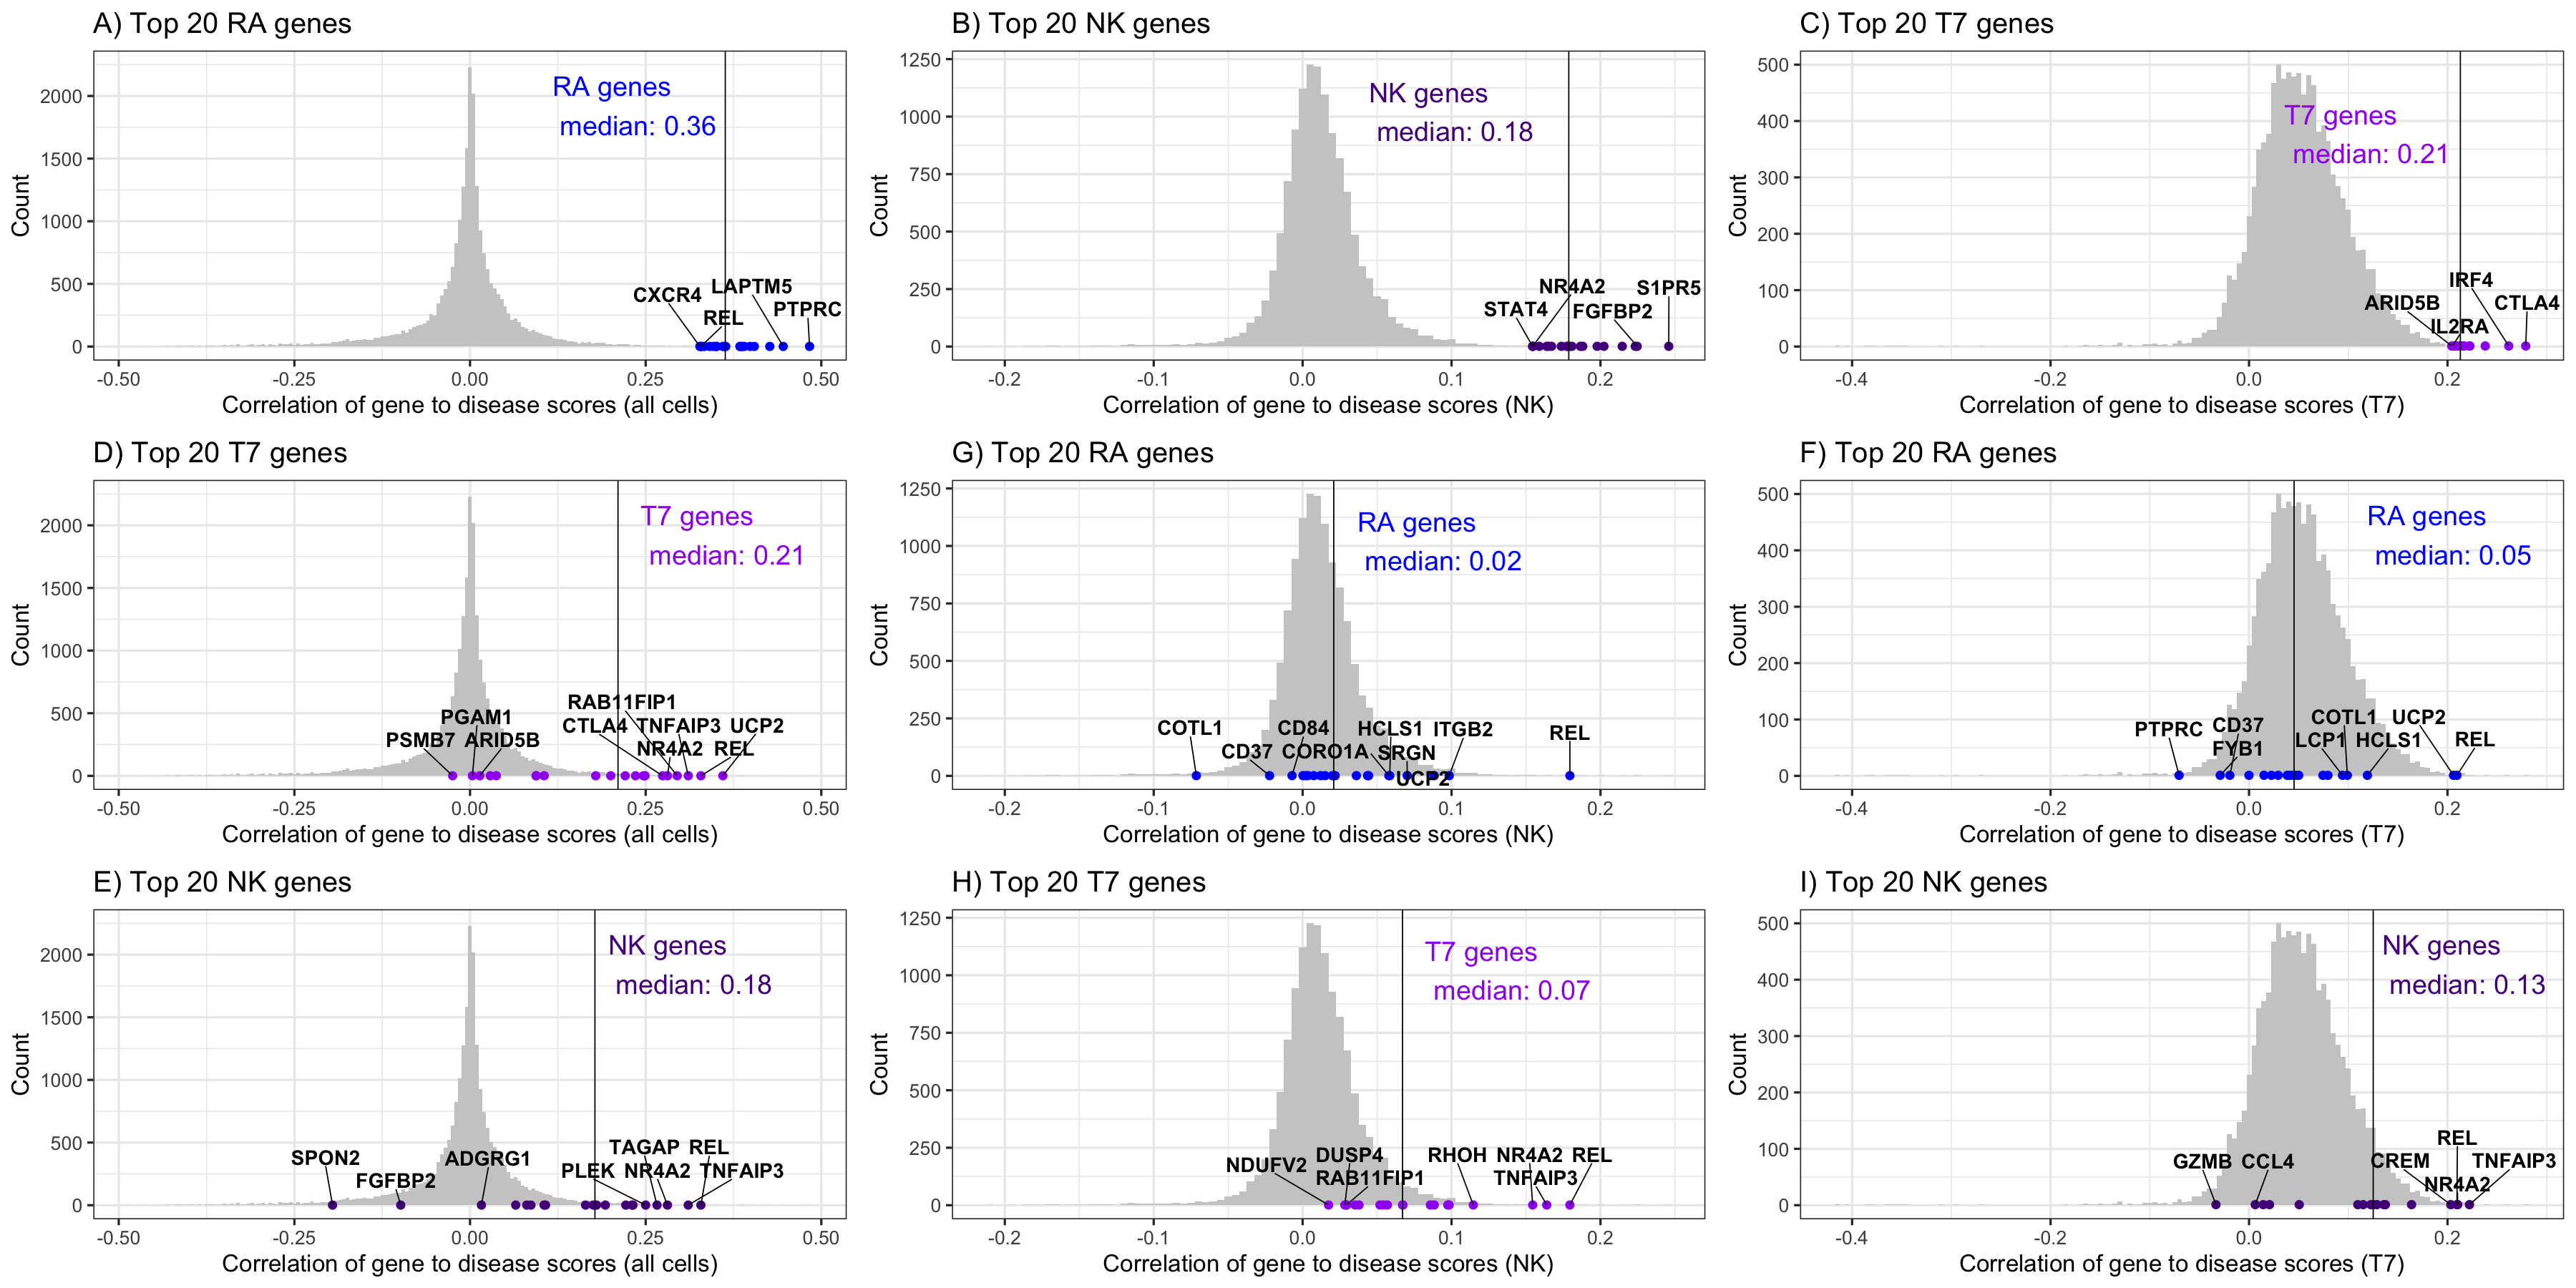

In [250]:
# plot all correlation values and see where the genes are
use = ra_scdrs_genes[ra_scdrs_genes$V1 %in% top_ra]
meda <- median(use$CORR)
pa <- ggplot() + geom_histogram(data=ra_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="blue", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("A) Top 20 RA genes") + 
geom_text_repel(data=use[use$V1 %in% c("PTPRC", "LAPTM5", "REL", "CXCR4"),], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=meda) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="blue", aes(x=meda-.28,y=2250, label=paste("RA genes\nmedian:", round(meda, 2))))
use = ra_scdrs_genes[ra_scdrs_genes$V1 %in% top_t7]
med1 <- median(use$CORR)
p1 <- ggplot() + geom_histogram(data=ra_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="purple", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("D) Top 20 T7 genes") + 
geom_text_repel(data=use[use$V1 %in% a,], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=med1) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="purple", aes(x=med1,y=2250, label=paste("T7 genes\nmedian:", round(med1, 2))))
use = ra_scdrs_genes[ra_scdrs_genes$V1 %in% top_nk]
med2 <- median(use$CORR)
p2 <- ggplot() + geom_histogram(data=ra_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="purple4", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("E) Top 20 NK genes") + 
geom_text_repel(data=use[use$V1 %in% b,], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=med2) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="purple4", aes(x=med2-0.015,y=2250, label=paste("NK genes\nmedian:", round(med2, 2))))

use = nk_scdrs_genes[nk_scdrs_genes$V1 %in% top_nk]
medb <- median(use$CORR)
pb <- ggplot() + geom_histogram(data=nk_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="purple4", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (NK)", y="Count") + ggtitle("B) Top 20 NK genes") + 
geom_text_repel(data=use[use$V1 %in% c("S1PR5", "FGFBP2", "NR4A2", "STAT4"),], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=medb) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="purple4", aes(x=medb-.15,y=1200, label=paste("NK genes\nmedian:", round(medb, 2))))
use = nk_scdrs_genes[nk_scdrs_genes$V1 %in% top_t7]
med4 <- median(use$CORR)
use = nk_scdrs_genes[nk_scdrs_genes$V1 %in% top_ra]
med3 <- median(use$CORR)
p3 <- ggplot() + geom_histogram(data=nk_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="blue", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (NK)", y="Count") + ggtitle("G) Top 20 RA genes") + 
geom_text_repel(data=use[use$V1 %in% c,], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=med3) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="blue", aes(x=med3,y=1200, label=paste("RA genes\nmedian:", round(med3, 2))))
use = nk_scdrs_genes[nk_scdrs_genes$V1 %in% top_t7]
med4 <- median(use$CORR)
p4 <- ggplot() + geom_histogram(data=nk_scdrs_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="purple", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (NK)", y="Count") + ggtitle("H) Top 20 T7 genes") + 
geom_text_repel(data=use[use$V1 %in% d,], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=med4) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="purple", aes(x=med4,y=1200, label=paste("T7 genes\nmedian:", round(med4, 2))))

use = scdrs_genes_t7[scdrs_genes_t7$V1 %in% top_t7]
medc <- median(use$CORR)
pc <- ggplot() + geom_histogram(data=scdrs_genes_t7, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="purple", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (T7)", y="Count") + ggtitle("C) Top 20 T7 genes") + 
geom_text_repel(data=use[use$V1 %in% c("CTLA4", "IRF4", "IL2RA", "ARID5B"),], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=medc) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="purple", aes(x=medc-0.2,y=450, label=paste("T7 genes\nmedian:", round(medc, 2))))
use = scdrs_genes_t7[scdrs_genes_t7$V1 %in% top_ra]
med5 <- median(use$CORR)
p5 <- ggplot() + geom_histogram(data=scdrs_genes_t7, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="blue", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (T7)", y="Count") + ggtitle("F) Top 20 RA genes") + 
geom_text_repel(data=use[use$V1 %in% e,], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=med5) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="blue", aes(x=med5+0.05,y=500, label=paste("RA genes\nmedian:", round(med5, 2))))
use = scdrs_genes_t7[scdrs_genes_t7$V1 %in% top_nk]
med6 <- median(use$CORR)
p6 <- ggplot() + geom_histogram(data=scdrs_genes_t7, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=use, color="purple4", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (T7)", y="Count") + ggtitle("I) Top 20 NK genes") + 
geom_text_repel(data=use[use$V1 %in% f,], 
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") + 
theme_bw(base_size=20) + geom_vline(xintercept=med6) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="purple4", aes(x=med6-0.015,y=500, label=paste("NK genes\nmedian:", round(med6, 2))))


options(repr.plot.height = 15, repr.plot.width =30 )
p <- plot_grid( pa, pb, pc,
                p1, p3, p5, 
               p2, p4, p6, nrow=3)
p

In [251]:
pdf("../../output/Final_figures/Corr_T7_NK_RA.pdf", height = 15, width =30)
print(p)
dev.off()

pdf 
  2

In [107]:
unique(df[df$cluster %in% names(meta_colors_nk),]$genes)

[1] "CD2"     "CD247"   "CORO1A"  "ETS1"    "FCGR3A"  "PTPRC"   "TXK"    
 [8] "GATA3"   "IL7R"    "RBM39"   "HCST"    "DDX6"    "REL"     "SH2D2A" 
[15] "CFLAR"   "IL2RB"   "CDC42"   "STAT4"   "PTPN22"  "CD48"    "NFKB1"  
[22] "TNFAIP3" "SFPQ"    "MYL6"    "JAK1"    "STAT1"   "STK4"    "UBE2I"  
[29] "RAC2"    "TAGAP"   "LMNA"    "RTF1"    "RUNX3"